# Consumer Credit Default Prediction Based on Selected Machine Learning Models

## 1. Introduction

**Problem**

The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting.

**Dataset**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable indicating whether an applicant eventually defaulted or was seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For each applicant, 12 input variables were recorded.

Target variable:
- BAD - variable indicating whether an applicant eventually defaulted or was seriously delinquent (1 = client defaulted on loan, 0 = loan repaid)

Input variables:
- LOAN - Amount of the loan request
- MORTDUE - Amount due on existing mortgage
- VALUE - Value of current property
- REASON - DebtCon = debt consolidation, HomeImp = home improvement
- JOB - Six occupational categories
- YOJ - Years at present job
- DEROG - Number of major derogatory reports
- DELINQ - Number of delinquent credit lines
- CLAGE - Age of oldest trade line in months
- NINQ - Number of recent credit lines
- CLNO - Number of credit lines
- DEBTINC - Debt-to-income ratio

Source:

https://www.kaggle.com/ajay1735/hmeq-data


## 2. Exploratory data analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 2.1. First insights into the data

In [3]:
# Reading a dataframe and displaying it's first 10 rows
data = pd.read_csv('hmeq.csv')
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
# Checking the dimensionality of the dataframe
data.shape

(5960, 13)

In [5]:
# Displaying basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


2.1.1. Detecting duplicated rows

In [6]:
# Counting the sum of duplicated rows
data.duplicated().sum()

0

2.1.2. Checking the target variable distribution

In [7]:
# Counting the sum of missing values for BAD variable
data['BAD'].isna().sum()

0

In [8]:
# Checking unique values for BAD variable
data['BAD'].unique()

array([1, 0], dtype=int64)

In [9]:
# Checking the counts of unique values for BAD variable
data['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

2.1.3. Identifying the number of missing values in the rows

In [10]:
# Counting the number of rows with a given number (from 0 to 12) of missing values in a row (for the whole data set)
for i in range(len(data.columns)):
    no_of_rows = (data.isnull().sum(axis=1) == i).sum()
    print(f'Number of rows with {i} missing value(s) in a row: {no_of_rows}')

Number of rows with 0 missing value(s) in a row: 3364
Number of rows with 1 missing value(s) in a row: 1589
Number of rows with 2 missing value(s) in a row: 449
Number of rows with 3 missing value(s) in a row: 219
Number of rows with 4 missing value(s) in a row: 64
Number of rows with 5 missing value(s) in a row: 83
Number of rows with 6 missing value(s) in a row: 66
Number of rows with 7 missing value(s) in a row: 25
Number of rows with 8 missing value(s) in a row: 39
Number of rows with 9 missing value(s) in a row: 49
Number of rows with 10 missing value(s) in a row: 11
Number of rows with 11 missing value(s) in a row: 2
Number of rows with 12 missing value(s) in a row: 0


In [11]:
# Counting the number of rows with a given number (from 0 to 12) of missing values in a row (only in the group 
# of 'good' loans, i.e. BAD = 0)
for i in range(len(data.columns)):
    no_of_rows_0 = (data.loc[data['BAD'] == 0].isnull().sum(axis=1) == i).sum()
    print(f'Number of rows with {i} missing value(s) in a row (BAD=0): {no_of_rows_0}')

Number of rows with 0 missing value(s) in a row (BAD=0): 3064
Number of rows with 1 missing value(s) in a row (BAD=0): 983
Number of rows with 2 missing value(s) in a row (BAD=0): 269
Number of rows with 3 missing value(s) in a row (BAD=0): 180
Number of rows with 4 missing value(s) in a row (BAD=0): 58
Number of rows with 5 missing value(s) in a row (BAD=0): 75
Number of rows with 6 missing value(s) in a row (BAD=0): 44
Number of rows with 7 missing value(s) in a row (BAD=0): 11
Number of rows with 8 missing value(s) in a row (BAD=0): 32
Number of rows with 9 missing value(s) in a row (BAD=0): 43
Number of rows with 10 missing value(s) in a row (BAD=0): 11
Number of rows with 11 missing value(s) in a row (BAD=0): 1
Number of rows with 12 missing value(s) in a row (BAD=0): 0


In [12]:
# Counting the number of rows with a given number (from 0 to 12) of missing values in a row (only in the group 
# of 'bad' loans, i.e. BAD = 1)
for i in range(len(data.columns)):
    no_of_rows_1 = (data.loc[data['BAD'] == 1].isnull().sum(axis=1) == i).sum()
    print(f'Number of rows with {i} missing value(s) in a row (BAD=1): {no_of_rows_1}')

Number of rows with 0 missing value(s) in a row (BAD=1): 300
Number of rows with 1 missing value(s) in a row (BAD=1): 606
Number of rows with 2 missing value(s) in a row (BAD=1): 180
Number of rows with 3 missing value(s) in a row (BAD=1): 39
Number of rows with 4 missing value(s) in a row (BAD=1): 6
Number of rows with 5 missing value(s) in a row (BAD=1): 8
Number of rows with 6 missing value(s) in a row (BAD=1): 22
Number of rows with 7 missing value(s) in a row (BAD=1): 14
Number of rows with 8 missing value(s) in a row (BAD=1): 7
Number of rows with 9 missing value(s) in a row (BAD=1): 6
Number of rows with 10 missing value(s) in a row (BAD=1): 0
Number of rows with 11 missing value(s) in a row (BAD=1): 1
Number of rows with 12 missing value(s) in a row (BAD=1): 0


We can remove rows with at least 10 missing values. There are 13 such the rows.
In other words, taking into account all 13 variables, we will keep all the rows with at least 4 non-NA values.

In [13]:
# Keeping only the rows with at least 4 non-NaN values
data.dropna(axis=0, thresh=4, inplace=True)

In [14]:
# Checking the dimensionality of the dataframe (after removing some of the rows)
data.shape

(5947, 13)

In [15]:
# Reseting the index of the dataframe
data.reset_index(drop=True, inplace=True)

2.1.4. Identifying the number of missing values in the columns

In [16]:
# Counting the sums of missing values (in the whole data set) for all variables separately
data.isna().sum()

BAD           0
LOAN          0
MORTDUE     505
VALUE       104
REASON      239
JOB         266
YOJ         502
DEROG       695
DELINQ      567
CLAGE       295
NINQ        497
CLNO        209
DEBTINC    1260
dtype: int64

In [17]:
# Counting the sums of missing values (only in the group of 'good' loans, i.e. BAD = 0) for all variables separately
data[data['BAD'] == 0].isna().sum()

BAD          0
LOAN         0
MORTDUE    400
VALUE        0
REASON     192
JOB        244
YOJ        438
DEROG      609
DELINQ     496
CLAGE      218
NINQ       423
CLNO       157
DEBTINC    475
dtype: int64

In [18]:
# Counting the sums of missing values (only in the group of 'bad' loans, i.e. BAD = 1) for all variables separately
data[data['BAD'] == 1].isna().sum()

BAD          0
LOAN         0
MORTDUE    105
VALUE      104
REASON      47
JOB         22
YOJ         64
DEROG       86
DELINQ      71
CLAGE       77
NINQ        74
CLNO        52
DEBTINC    785
dtype: int64

In [19]:
# Creating a dataframe with percentages of missing values (for each variable, except for BAD variable): 
# for the whole data set, and in the groups of 'good' and 'bad' loans separately

columns_names = []
missing_values_percentages_all = []
missing_values_percentages_0 = []
missing_values_percentages_1 = []

for column in data.columns[1:]:
    columns_names.append(column)
    missing_values_percentages_all.append(round((data[column].isna().sum()/len(data)*100),2))
    missing_values_percentages_0.append(round((data[data['BAD'] == 0][column].isna().sum()/len(data[data['BAD'] == 0])*100),2))
    missing_values_percentages_1.append(round((data[data['BAD'] == 1][column].isna().sum()/len(data[data['BAD'] == 1])*100),2))
    
missing_values_percentages = pd.DataFrame({
    'Variable': columns_names,
    'missing values in the whole data set (%)': missing_values_percentages_all,
    'missing values in the group of good loans (%)': missing_values_percentages_0,
    'missing values in the group of bad loans (%)': missing_values_percentages_1
})

In [20]:
# Displaying a dataframe containing percentages of missing values
missing_values_percentages

,Variable,missing values in the whole data set (%),missing values in the group of good loans (%),missing values in the group of bad loans (%)
0,LOAN,0.00,0.00,0.00
1,MORTDUE,8.49,8.41,8.84
2,VALUE,1.75,0.00,8.75
3,REASON,4.02,4.03,3.96
4,JOB,4.47,5.13,1.85
5,YOJ,8.44,9.20,5.39
6,DEROG,11.69,12.80,7.24
7,DELINQ,9.53,10.42,5.98
8,CLAGE,4.96,4.58,6.48
9,NINQ,8.36,8.89,6.23


2.1.5. Calculating descriptive statistics

In [21]:
# Generating descriptive statistics values for the whole data set
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5947.0,NaN,NaN,NaN,0.199765,0.399857,0.0,0.0,0.0,0.0,1.0
LOAN,5947.0,NaN,NaN,NaN,18626.114007,11210.081434,1100.0,11100.0,16400.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5843.0,NaN,NaN,NaN,101796.624857,57397.544476,8000.0,66083.5,89250.0,119831.5,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


In [22]:
# Generating descriptive statistics values in the group of 'good' loans (BAD = 0)
data[data['BAD'] == 0].drop('BAD', axis=1).describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LOAN,4759.0,NaN,NaN,NaN,19048.24543,11119.641715,1700.0,11700.0,16900.0,23500.0,89900.0
MORTDUE,4359.0,NaN,NaN,NaN,74829.249055,43584.993587,2619.0,47484.0,66839.0,93068.0,371003.0
VALUE,4759.0,NaN,NaN,NaN,102622.045331,52758.626008,8000.0,67330.5,90727.0,120631.0,471827.0
REASON,4567,2,DebtCon,3183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,4515,6,Other,1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,4321.0,NaN,NaN,NaN,9.154941,7.676033,0.0,3.0,7.0,13.0,36.0
DEROG,4150.0,NaN,NaN,NaN,0.134217,0.51449,0.0,0.0,0.0,0.0,6.0
DELINQ,4263.0,NaN,NaN,NaN,0.245133,0.674124,0.0,0.0,0.0,0.0,5.0
CLAGE,4541.0,NaN,NaN,NaN,187.002355,84.465217,0.486711,120.219885,180.415787,240.157802,649.747104
NINQ,4336.0,NaN,NaN,NaN,1.032749,1.531322,0.0,0.0,1.0,2.0,11.0


In [23]:
# Generating descriptive statistics values in the group of 'bad' loans (BAD = 1)
data[data['BAD'] == 1].drop('BAD', axis=1).describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LOAN,1188.0,NaN,NaN,NaN,16935.10101,11414.482822,1100.0,9200.0,14950.0,21700.0,77400.0
MORTDUE,1083.0,NaN,NaN,NaN,69460.452973,47588.194467,2063.0,39946.5,60279.0,85864.5,399550.0
VALUE,1084.0,NaN,NaN,NaN,98172.846227,74339.822506,8800.0,59368.25,82000.0,116000.0,855909.0
REASON,1141,2,DebtCon,745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,1166,6,Other,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,1124.0,NaN,NaN,NaN,8.027802,7.100735,0.0,2.0,6.0,12.0,41.0
DEROG,1102.0,NaN,NaN,NaN,0.707804,1.468381,0.0,0.0,0.0,1.0,10.0
DELINQ,1117.0,NaN,NaN,NaN,1.229185,1.902961,0.0,0.0,0.0,2.0,15.0
CLAGE,1111.0,NaN,NaN,NaN,150.190183,84.952286,0.0,96.033333,132.866667,193.283333,1168.233561
NINQ,1114.0,NaN,NaN,NaN,1.782765,2.246976,0.0,0.0,1.0,3.0,17.0


2.1.6. Detecting outliers

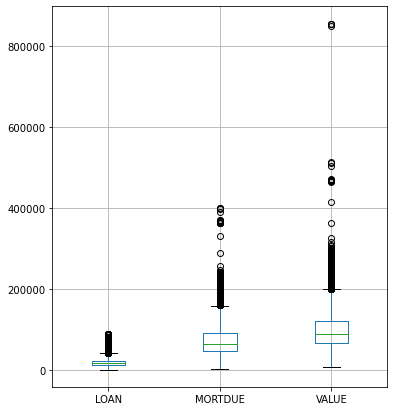

In [24]:
# Drawing a boxplot for LOAN, MORTDUE and VALUE variables
data.boxplot(column=['LOAN', 'MORTDUE', 'VALUE'], figsize=(6,7))
plt.show()

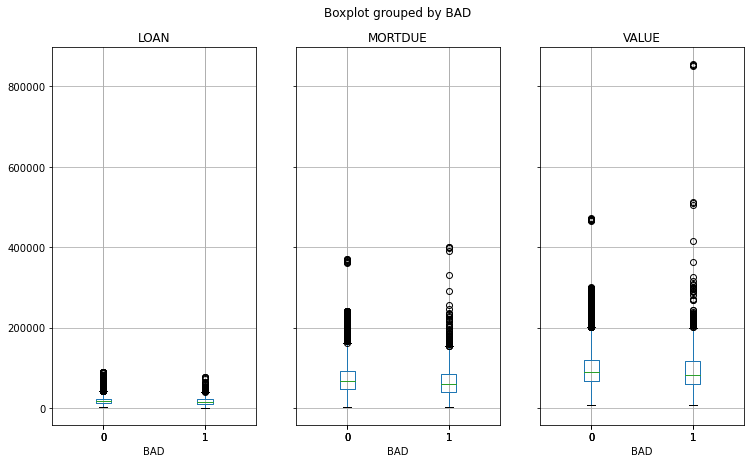

In [25]:
# Drawing a boxplot for LOAN, MORTDUE and VALUE variables in the groups of good and bad loans
data.boxplot(column=['LOAN', 'MORTDUE', 'VALUE'], by='BAD', layout=(1,3), figsize=(12,7))
plt.show()

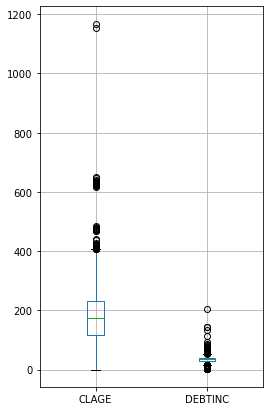

In [26]:
# Drawing a boxplot for CLAGE and DEBTINC variables
data.boxplot(column=['CLAGE', 'DEBTINC'], figsize=(4,7))
plt.show()

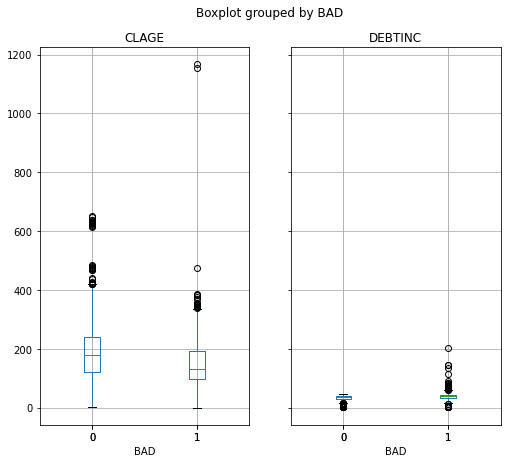

In [27]:
# Drawing a boxplot for CLAGE and DEBTINC variables in the groups of good and bad loans
data.boxplot(column=['CLAGE', 'DEBTINC'], by='BAD', layout=(1,2), figsize=(8,7))
plt.show()

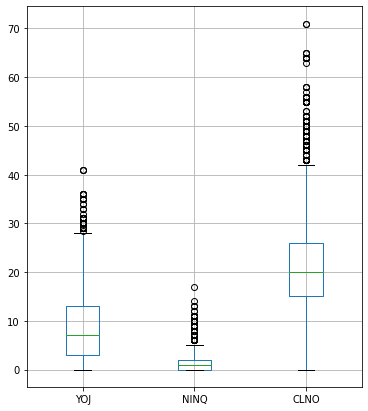

In [28]:
# Drawing a boxplot for YOJ, NINQ and CLNO variables
data.boxplot(column=['YOJ', 'NINQ', 'CLNO'], figsize=(6,7))
plt.show()

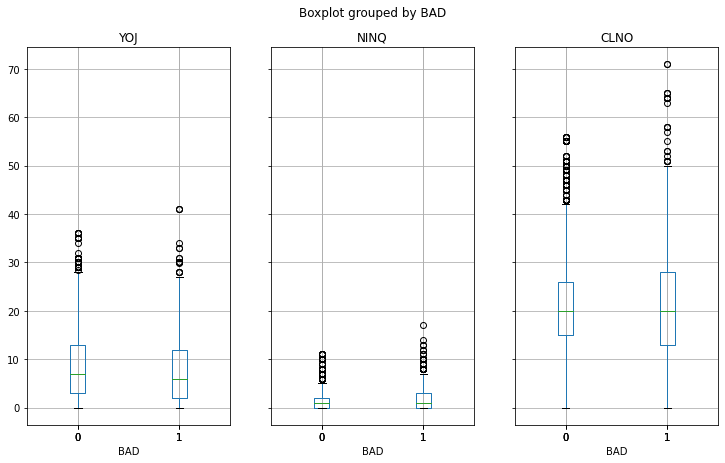

In [29]:
# Drawing a boxplot for YOJ, NINQ and CLNO variables in the groups of good and bad loans
data.boxplot(column=['YOJ', 'NINQ', 'CLNO'], by='BAD', layout=(1,3), figsize=(12,7))
plt.show()

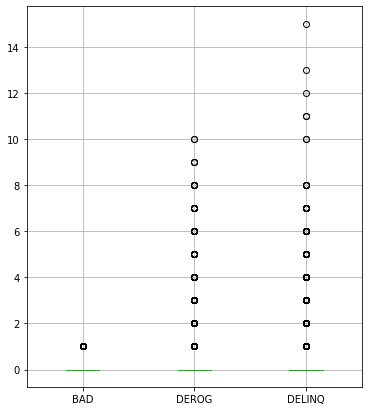

In [30]:
# Drawing a boxplot for BAD, DEROG and DELINQ variables
data.boxplot(column=['BAD', 'DEROG', 'DELINQ'], figsize=(6,7))
plt.show()

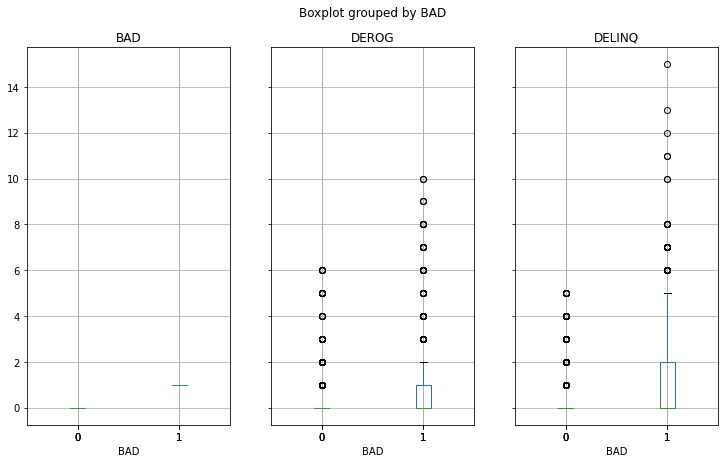

In [31]:
# Drawing a boxplot for BAD, DEROG and DELINQ variables in the groups of good and bad loans
data.boxplot(column=['BAD', 'DEROG', 'DELINQ'], by='BAD', layout=(1,3), figsize=(12,7))
plt.show()

In [32]:
# Creating a dataframe with percentages of outliers (for each variable, except for binary variable BAD and
# categorical variables REASON and JOB): in the whole data set, and in the groups of 'good' and 'bad' 
# loans separately

k = 1.5

columns_names = []
outliers_percentages_all = []
outliers_percentages_0 = []
outliers_percentages_1 = []

for column in ['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'DEBTINC', 'YOJ', 'NINQ', 'CLNO', 'DEROG', 'DELINQ']:
    columns_names.append(column)
    Q1_all = data[column].quantile(0.25)
    Q3_all = data[column].quantile(0.75)
    number_outliers_all = ((data[column]<(Q1_all-k*(Q3_all-Q1_all))) | (data[column]>(Q3_all+k*(Q3_all-Q1_all)))).sum()
    outliers_percentages_all.append(round((number_outliers_all/len(data)*100),2))
    
    Q1_0 = data[data['BAD'] == 0][column].quantile(0.25)
    Q3_0 = data[data['BAD'] == 0][column].quantile(0.75)
    number_outliers_0 = ((data[data['BAD'] == 0][column]<(Q1_0-k*(Q3_0-Q1_0))) | (data[data['BAD'] == 0][column]>(Q3_0+k*(Q3_0-Q1_0)))).sum()
    outliers_percentages_0.append(round((number_outliers_0/len(data[data['BAD'] == 0])*100),2))
    
    Q1_1 = data[data['BAD'] == 1][column].quantile(0.25)
    Q3_1 = data[data['BAD'] == 1][column].quantile(0.75)
    number_outliers_1 = ((data[data['BAD'] == 1][column]<(Q1_1-k*(Q3_1-Q1_1))) | (data[data['BAD'] == 1][column]>(Q3_1+k*(Q3_1-Q1_1)))).sum()
    outliers_percentages_1.append(round((number_outliers_1/len(data[data['BAD'] == 1])*100),2))
    
outliers_percentages = pd.DataFrame({
    'Variable': columns_names,
    'outliers in the whole data set (%)': outliers_percentages_all,
    'outliers in the group of good loans (%)': outliers_percentages_0,
    'outliers in the group of bad loans (%)': outliers_percentages_1
})

In [33]:
# Displaying a dataframe containing percentages of outliers
outliers_percentages

,Variable,outliers in the whole data set (%),outliers in the group of good loans (%),outliers in the group of bad loans (%)
0,LOAN,4.30,4.31,5.13
1,MORTDUE,3.93,3.66,5.05
2,VALUE,5.38,5.32,5.47
3,CLAGE,0.79,0.69,1.52
4,DEBTINC,1.60,0.92,3.45
5,YOJ,1.53,1.62,1.52
6,NINQ,2.98,2.06,2.95
7,CLNO,3.68,3.43,1.94
8,DEROG,12.19,7.92,8.16
9,DELINQ,20.20,14.02,4.38


In [34]:
# Creating a dataframe with percentages of extreme outliers (for each variable, except for binary variable BAD
# and categorical variables REASON and JOB): in the whole data set, and in the groups of 'good' and 'bad' 
# loans separately

k = 3 # not all outliers, only extreme ones

columns_names = []
outliers_percentages_all = []
outliers_percentages_0 = []
outliers_percentages_1 = []

for column in ['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'DEBTINC', 'YOJ', 'NINQ', 'CLNO', 'DEROG', 'DELINQ']:
    columns_names.append(column)
    Q1_all = data[column].quantile(0.25)
    Q3_all = data[column].quantile(0.75)
    number_outliers_all = ((data[column]<(Q1_all-k*(Q3_all-Q1_all))) | (data[column]>(Q3_all+k*(Q3_all-Q1_all)))).sum()
    outliers_percentages_all.append(round((number_outliers_all/len(data)*100),2))
    
    Q1_0 = data[data['BAD'] == 0][column].quantile(0.25)
    Q3_0 = data[data['BAD'] == 0][column].quantile(0.75)
    number_outliers_0 = ((data[data['BAD'] == 0][column]<(Q1_0-k*(Q3_0-Q1_0))) | (data[data['BAD'] == 0][column]>(Q3_0+k*(Q3_0-Q1_0)))).sum()
    outliers_percentages_0.append(round((number_outliers_0/len(data[data['BAD'] == 0])*100),2))
    
    Q1_1 = data[data['BAD'] == 1][column].quantile(0.25)
    Q3_1 = data[data['BAD'] == 1][column].quantile(0.75)
    number_outliers_1 = ((data[data['BAD'] == 1][column]<(Q1_1-k*(Q3_1-Q1_1))) | (data[data['BAD'] == 1][column]>(Q3_1+k*(Q3_1-Q1_1)))).sum()
    outliers_percentages_1.append(round((number_outliers_1/len(data[data['BAD'] == 1])*100),2))
    
extreme_outliers_percentages = pd.DataFrame({
    'Variable': columns_names,
    'outliers in the whole data set (%)': outliers_percentages_all,
    'outliers in the group of good loans (%)': outliers_percentages_0,
    'outliers in the group of bad loans (%)': outliers_percentages_1
})

In [35]:
# Displaying a dataframe containing percentages of extreme outliers
extreme_outliers_percentages

,Variable,outliers in the whole data set (%),outliers in the group of good loans (%),outliers in the group of bad loans (%)
0,LOAN,1.08,1.26,0.76
1,MORTDUE,1.11,1.07,1.09
2,VALUE,1.45,1.32,1.94
3,CLAGE,0.34,0.38,0.17
4,DEBTINC,0.25,0.00,0.84
5,YOJ,0.00,0.00,0.00
6,NINQ,0.92,0.65,0.34
7,CLNO,0.18,0.00,0.00
8,DEROG,12.19,7.92,3.03
9,DELINQ,20.20,14.02,0.59


In [36]:
# Calculating values of the skewness coefficient
data.skew()

BAD        1.502219
LOAN       2.023906
MORTDUE    1.814481
VALUE      3.053214
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.853038
dtype: float64

Summary:
- there are no duplicated rows in the dataframe,
- rows with a high number of missing data (at least 10 missing values) were removed from the dataframe,
- most variables (except for BAD and LOAN) have missing values,
- the highest percentage of missing data is observed in case of DEBTINC variable (almost 22% of all observations of the variable are missing, but in the group of bad loans it is more than 66%),
- BAD, DEROG and DELINQ variables have a lot of zeros (for these features in the whole data set: minimum = 0, third quartile = 0),
- the maximum value 1168.23 months (i.e. 97.4 years) of CLAGE variable seems to be suspect (the oldest trade line for a certain credit recipient has 97.4 years; is it possible?),
- there are many outliers which make variables distributions skewed (during the analysis we will use variables transformations so as to reduce the influence of outliers and make variables distributions more similar to a normal distribution).

### 2.2. Target variable

Target variable: **BAD**

In [37]:
# Checking the counts of unique values for BAD variable 
data['BAD'].value_counts()

0    4759
1    1188
Name: BAD, dtype: int64

In [38]:
# Counting the sum of missing values for BAD variable
data['BAD'].isna().sum()

0

In [39]:
data['BAD'].value_counts()[0] / data['BAD'].value_counts()[1]

4.005892255892256

Target classes are imbalanced (label [0] is about 4 times more frequent than label [1]).

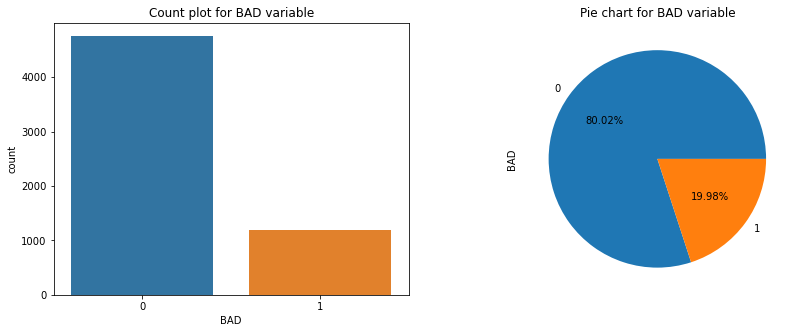

In [40]:
# Drawing a count plot and a pie chart for BAD variable
fig, axes = plt.subplots(figsize=(14,5), nrows=1, ncols=2)
sns.countplot(x='BAD', data=data, order=[0, 1], ax=axes[0])
axes[0].set_title('Count plot for BAD variable')
data['BAD'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title('Pie chart for BAD variable')
plt.show()

### 2.3. Input variables

In [41]:
# The list below will store consecutive feature names treated as categorical ones during analysis
# (categorical features will be later converted into dummy variables)
categorical_features = []

Variable: **LOAN**

In [42]:
# Checking the counts of unique values for LOAN variable
data['LOAN'].value_counts()

15000    105
10000     81
20000     74
25000     73
12000     69
        ... 
63300      1
35300      1
68000      1
59800      1
65500      1
Name: LOAN, Length: 540, dtype: int64

In [43]:
# Counting the sum of missing values for LOAN variable
data['LOAN'].isna().sum()

0

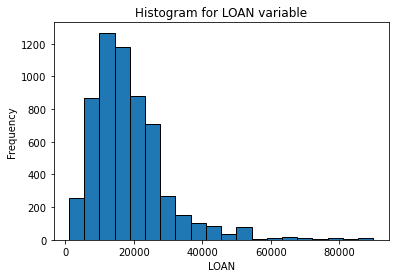

In [44]:
# Drawing a histogram for LOAN variable
data['LOAN'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for LOAN variable')
plt.xlabel('LOAN')
plt.show()

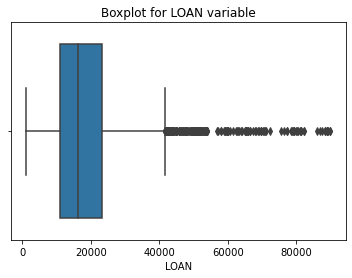

In [45]:
# Drawing a boxplot for LOAN variable
sns.boxplot(x='LOAN',data=data)
plt.title('Boxplot for LOAN variable')
plt.show()

In [46]:
# Calculating the skewness coefficient value
data['LOAN'].skew()

2.0239058876939375

This variable has a skewed distribution. Therefore, we can introduce logarithmic transformation.

In [47]:
# Checking the minimum value of the variable distribution
data['LOAN'].min()

1100

In [48]:
# Creating a new log_LOAN variable
data['log_LOAN'] = np.log(data['LOAN'])

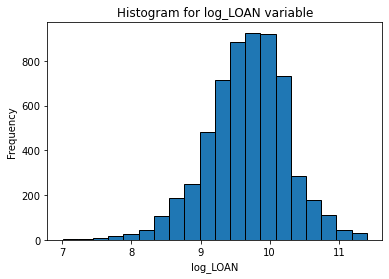

In [49]:
# Drawing a histogram for log_LOAN variable
data['log_LOAN'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for log_LOAN variable')
plt.xlabel('log_LOAN')
plt.show()

In [50]:
# Checking the distribution skewness (after logarithmic transformation)
data['log_LOAN'].skew()

-0.2898413819692432

In [51]:
# Removing LOAN variable from the dataframe
data.drop('LOAN', axis=1, inplace=True)

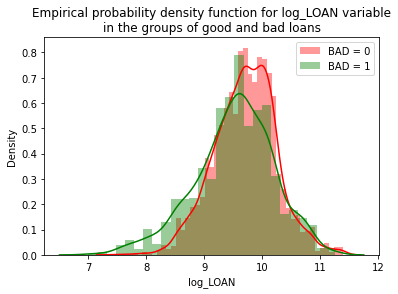

In [52]:
# Drawing an empirical probability density function for log_LOAN variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['log_LOAN'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['log_LOAN'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for log_LOAN variable\nin the groups of good and bad loans')
plt.show()

Variable: **MORTDUE**

In [53]:
# Checking the counts of unique values for MORTDUE variable
data['MORTDUE'].value_counts()

42000.0     11
47000.0     10
65000.0      9
55000.0      7
124000.0     7
            ..
31400.0      1
147622.0     1
21137.0      1
93413.0      1
108763.0     1
Name: MORTDUE, Length: 5053, dtype: int64

In [54]:
# Counting the sum of missing values for MORTDUE variable
data['MORTDUE'].isna().sum()

505

In [55]:
# Counting the sum of missing values for MORTDUE variable in the group of good loans
data[data['BAD'] == 0]['MORTDUE'].isna().sum()

400

In [56]:
# Counting the sum of missing values for MORTDUE variable in the group of bad loans
data[data['BAD'] == 1]['MORTDUE'].isna().sum()

105

We can fill missing values with the median.

In [57]:
# Filling missing values for MORTDUE variable in the group of good loans with the median from this group
data.loc[(data['BAD'] == 0) & (data['MORTDUE'].isna()), 'MORTDUE'] = data[data['BAD'] == 0]['MORTDUE'].median()

In [58]:
# Filling missing values for MORTDUE variable in the group of bad loans with the median from this group
data.loc[(data['BAD'] == 1) & (data['MORTDUE'].isna()), 'MORTDUE'] = data[data['BAD'] == 1]['MORTDUE'].median()

In [59]:
# Counting the sum of missing values for MORTDUE variable
data['MORTDUE'].isna().sum()

0

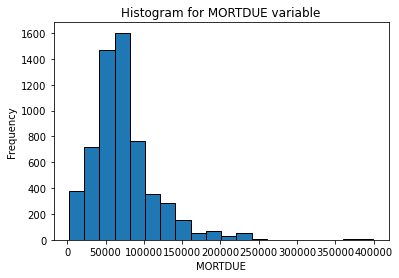

In [60]:
# Drawing a histogram for MORTDUE variable
data['MORTDUE'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for MORTDUE variable')
plt.xlabel('MORTDUE')
plt.show()

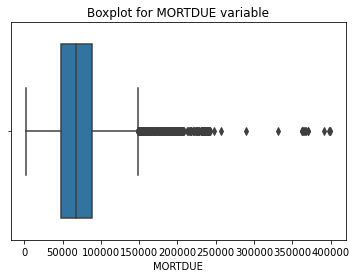

In [61]:
# Drawing a boxplot for MORTDUE variable
sns.boxplot(x='MORTDUE',data=data)
plt.title('Boxplot for MORTDUE variable')
plt.show()

In [62]:
# Calculating the skewness coefficient value
data['MORTDUE'].skew()

1.9361801455729115

This variable has a skewed distribution. Therefore, we can introduce logarithmic transformation.

In [63]:
# Checking the minimum value of the variable distribution
data['MORTDUE'].min()

2063.0

In [64]:
# Creating a new log_MORTDUE variable
data['log_MORTDUE'] = np.log(data['MORTDUE'])

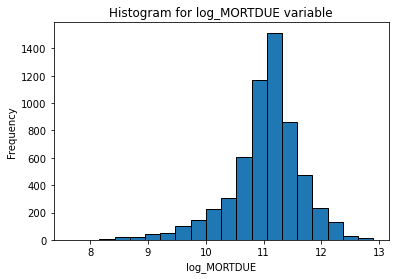

In [65]:
# Drawing a histogram for log_MORTDUE variable
data['log_MORTDUE'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for log_MORTDUE variable')
plt.xlabel('log_MORTDUE')
plt.show()

In [66]:
# Checking the distribution skewness (after logarithmic transformation)
data['log_MORTDUE'].skew()

-0.9047941656426647

In [67]:
# Removing MORTDUE variable from the dataframe
data.drop('MORTDUE', axis=1, inplace=True)

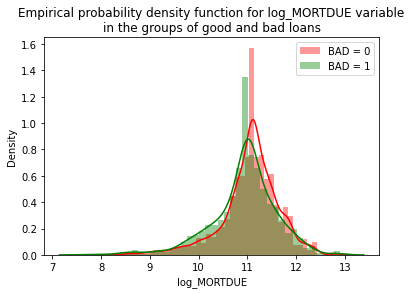

In [68]:
# Drawing an empirical probability density function for log_MORTDUE variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['log_MORTDUE'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['log_MORTDUE'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for log_MORTDUE variable\nin the groups of good and bad loans')
plt.show()

Variable: **VALUE**

In [69]:
# Checking the counts of unique values for VALUE variable
data['VALUE'].value_counts()

60000.0     15
80000.0     14
85000.0     12
65000.0     11
78000.0     10
            ..
89823.0      1
143087.0     1
68951.0      1
84778.0      1
71449.0      1
Name: VALUE, Length: 5377, dtype: int64

In [70]:
# Counting the sum of missing values for VALUE variable
data['VALUE'].isna().sum()

104

In [71]:
# Counting the sum of missing values for VALUE variable in the group of good loans
data[data['BAD'] == 0]['VALUE'].isna().sum()

0

In [72]:
# Counting the sum of missing values for VALUE variable in the group of bad loans
data[data['BAD'] == 1]['VALUE'].isna().sum()

104

We can fill missing values with the median.

In [73]:
# Filling missing values (which are only in the group of bad loans) for VALUE variable with the median from this group
data['VALUE'].fillna(data[data['BAD'] == 1]['VALUE'].median(), inplace=True)

In [74]:
# Counting the sum of missing values for VALUE variable
data['VALUE'].isna().sum()

0

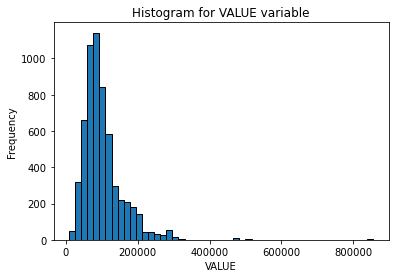

In [75]:
# Drawing a histogram for VALUE variable
data['VALUE'].plot.hist(edgecolor='black', bins=50)
plt.title('Histogram for VALUE variable')
plt.xlabel('VALUE')
plt.show()

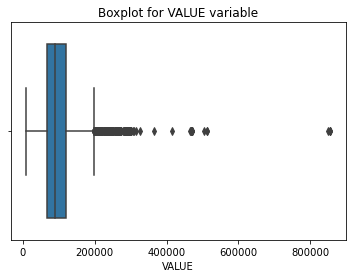

In [76]:
# Drawing a boxplot for VALUE variable
sns.boxplot(x='VALUE',data=data)
plt.title('Boxplot for VALUE variable')
plt.show()

In [77]:
# Selecting dataframe rows for which VALUE is greater than 800000
data[data['VALUE'] > 800000]

,BAD,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,log_LOAN,log_MORTDUE
5652,1,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,NaN,10.596635,11.006739
5693,1,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645,10.638256,11.006739
5694,1,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779,10.638256,11.006739
5739,1,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408,10.680516,11.006739


In [78]:
# Calculating the skewness coefficient value
data['VALUE'].skew()

3.088171559371217

This variable has a skewed distribution. Therefore, we can introduce logarithmic transformation.

In [79]:
# Checking the minimum value of the variable distribution
data['VALUE'].min()

8000.0

In [80]:
# Creating a new log_VALUE variable
data['log_VALUE'] = np.log(data['VALUE'])

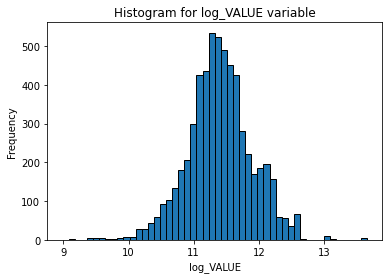

In [81]:
# Drawing a histogram for log_VALUE variable
data['log_VALUE'].plot.hist(edgecolor='black', bins=50)
plt.title('Histogram for log_VALUE variable')
plt.xlabel('log_VALUE')
plt.show()

In [82]:
# Checking the distribution skewness (after logarithmic transformation)
data['log_VALUE'].skew()

-0.0675909496544199

In [83]:
# Removing VALUE variable from the dataframe
data.drop('VALUE', axis=1, inplace=True)

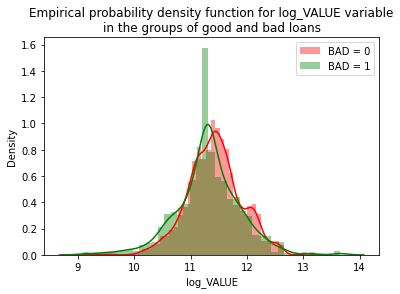

In [84]:
# Drawing an empirical probability density function for log_VALUE variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['log_VALUE'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['log_VALUE'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for log_VALUE variable\nin the groups of good and bad loans')
plt.show()

Variable: **REASON**

In [85]:
# Checking the counts of unique values for VALUE variable
data['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [86]:
# Counting the sum of missing values for REASON variable
data['REASON'].isna().sum()

239

In [87]:
# Counting the sum of missing values for REASON variable in the group of good loans
data[data['BAD'] == 0]['REASON'].isna().sum()

192

In [88]:
# Counting the sum of missing values for REASON variable in the group of bad loans
data[data['BAD'] == 1]['REASON'].isna().sum()

47

We can fill missing values with "NotGiven" category. 

In [89]:
data['REASON'].fillna('NotGiven', inplace=True)

In [90]:
# Counting the sum of missing values for REASON variable
data['REASON'].isna().sum()

0

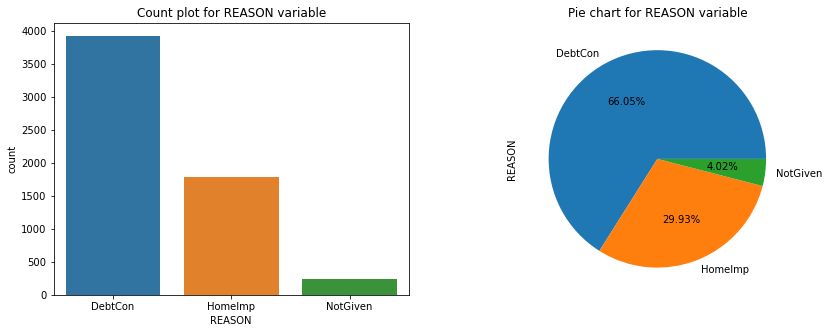

In [91]:
# Drawing a count plot and a pie chart for REASON variable
fig, axes = plt.subplots(figsize=(14,5), nrows=1, ncols=2)
sns.countplot(x='REASON', data=data, order=['DebtCon', 'HomeImp', 'NotGiven'], ax=axes[0])
axes[0].set_title('Count plot for REASON variable')
data['REASON'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title('Pie chart for REASON variable')
plt.show()

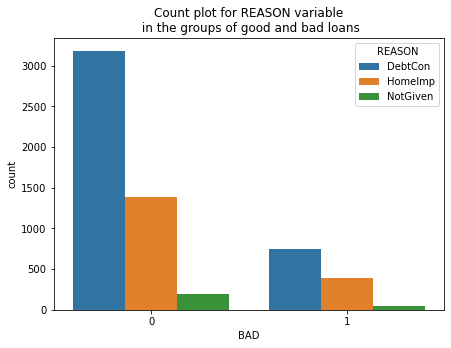

In [92]:
# Drawing a count plot for REASON variable in the groups of good and bad loans
plt.figure(figsize=(7, 5))
sns.countplot(x='BAD', hue='REASON', hue_order=['DebtCon', 'HomeImp', 'NotGiven'], data=data)\
.set(title='Count plot for REASON variable\n in the groups of good and bad loans')
plt.show()

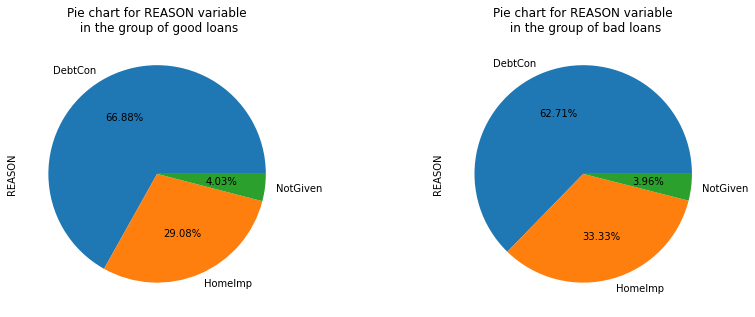

In [93]:
# Drawing a pie chart for REASON variable in the groups of good and bad loans
fig, axes = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
data[data['BAD'] == 0]['REASON'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[0])
axes[0].set_title('Pie chart for REASON variable\n in the group of good loans')
data[data['BAD'] == 1]['REASON'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title('Pie chart for REASON variable\n in the group of bad loans')
plt.show()

In [94]:
# Adding the name of REASON variable to the end of the list
categorical_features.append('REASON')

Variable: **JOB**

In [95]:
# Checking the counts of unique values for JOB variable
data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [96]:
# Counting the sum of missing values for JOB variable
data['JOB'].isna().sum()

266

In [97]:
# Counting the sum of missing values for JOB variable in the group of good loans
data[data['BAD'] == 0]['JOB'].isna().sum()

244

In [98]:
# Counting the sum of missing values for JOB variable in the group of bad loans
data[data['BAD'] == 1]['JOB'].isna().sum()

22

We can fill missing values with "NotGiven" category. 

In [99]:
data['JOB'].fillna('NotGiven', inplace=True)

In [100]:
# Counting the sum of missing values for JOB variable
data['JOB'].isna().sum()

0

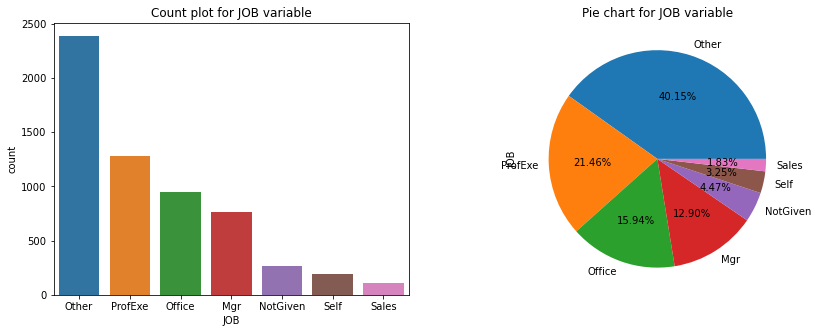

In [101]:
# Drawing a count plot and a pie chart for JOB variable
fig, axes = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
sns.countplot(x='JOB', data=data, order=['Other', 'ProfExe', 'Office', 'Mgr', 'NotGiven', 'Self', 'Sales'], ax=axes[0])
axes[0].set_title('Count plot for JOB variable')
data['JOB'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title('Pie chart for JOB variable')
plt.show()

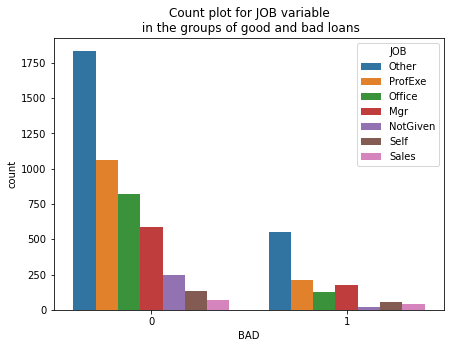

In [102]:
# Drawing a count plot for JOB variable in the groups of good and bad loans
plt.figure(figsize=(7, 5))
sns.countplot(x='BAD', hue='JOB', hue_order=['Other', 'ProfExe', 'Office', 'Mgr', 'NotGiven', 'Self', 'Sales'],
              data=data).set(title='Count plot for JOB variable\n in the groups of good and bad loans')
plt.show()

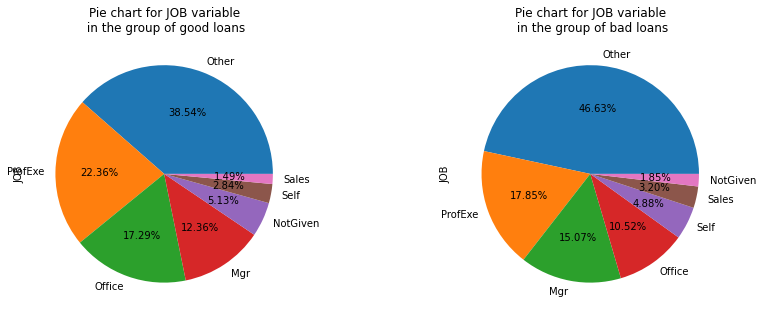

In [103]:
# Drawing a pie chart for JOB variable in the groups of good and bad loans
fig, axes = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
data[data['BAD'] == 0]['JOB'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[0])
axes[0].set_title('Pie chart for JOB variable\n in the group of good loans')
data[data['BAD'] == 1]['JOB'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title('Pie chart for JOB variable\n in the group of bad loans')
plt.show()

In [104]:
# Adding the name of JOB variable to the end of the list
categorical_features.append('JOB')

Variable: **YOJ**

In [105]:
# Checking the counts of unique values for YOJ variable
data['YOJ'].value_counts()

0.0     415
1.0     363
2.0     347
5.0     333
4.0     324
       ... 
6.6       1
24.5      1
12.9      1
19.5      1
3.2       1
Name: YOJ, Length: 99, dtype: int64

In [106]:
# Counting the sum of missing values for YOJ variable
data['YOJ'].isna().sum()

502

In [107]:
# Counting the sum of missing values for YOJ variable in the group of good loans
data[data['BAD'] == 0]['YOJ'].isna().sum()

438

In [108]:
# Counting the sum of missing values for YOJ variable in the group of bad loans
data[data['BAD'] == 1]['YOJ'].isna().sum()

64

We can fill missing values with the median.

In [109]:
# Filling missing values for YOJ variable in the group of good loans with the median from this group
data.loc[(data['BAD'] == 0) & (data['YOJ'].isna()), 'YOJ'] = data[data['BAD'] == 0]['YOJ'].median()

In [110]:
# Filling missing values for YOJ variable in the group of bad loans with the median from this group
data.loc[(data['BAD'] == 1) & (data['YOJ'].isna()), 'YOJ'] = data[data['BAD'] == 1]['YOJ'].median()

In [111]:
# Counting the sum of missing values for YOJ variable
data['YOJ'].isna().sum()

0

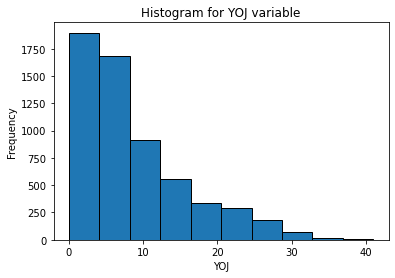

In [112]:
# Drawing a histogram for YOJ variable
data['YOJ'].plot.hist(edgecolor='black')
plt.title('Histogram for YOJ variable')
plt.xlabel('YOJ')
plt.show()

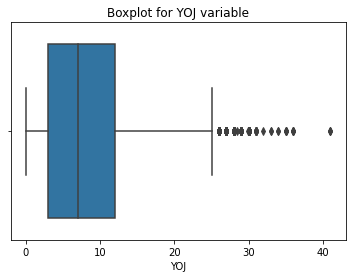

In [113]:
# Drawing a boxplot for YOJ variable
sns.boxplot(x='YOJ',data=data)
plt.title('Boxplot for YOJ variable')
plt.show()

In [114]:
# Calculating the skewness coefficient value
data['YOJ'].skew()

1.0925897677598444

This variable has a skewed distribution. Therefore, we can introduce square root transformation (in our case, it gives better results than logarithmic transformation, taking into account the similarity of YOJ variable distribution to a normal distribution).

In [115]:
# Checking the minimum value of the variable distribution
data['YOJ'].min()

0.0

In [116]:
# Creating a new sqrt_YOJ variable
data['sqrt_YOJ'] = np.sqrt(data['YOJ'])

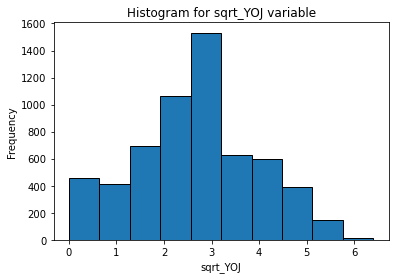

In [117]:
# Drawing a histogram for sqrt_YOJ variable
data['sqrt_YOJ'].plot.hist(edgecolor='black')
plt.title('Histogram for sqrt_YOJ variable')
plt.xlabel('sqrt_YOJ')
plt.show()

In [118]:
# Checking the distribution skewness (after square root transformation)
data['sqrt_YOJ'].skew()

-0.04967424084655129

In [119]:
# Removing YOJ variable from the dataframe
data.drop('YOJ', axis=1, inplace=True)

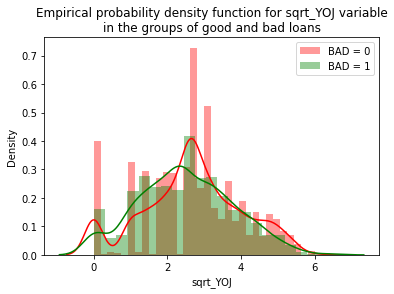

In [120]:
# Drawing an empirical probability density function for sqrt_YOJ variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['sqrt_YOJ'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['sqrt_YOJ'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for sqrt_YOJ variable\nin the groups of good and bad loans')
plt.show()

Variable: **DEROG**

In [121]:
# Checking the counts of unique values for DEROG variable
data['DEROG'].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [122]:
# Checking the counts of unique values for DEROG variable in the group of good loans
data[data['BAD'] == 0]['DEROG'].value_counts()

0.0    3773
1.0     266
2.0      78
3.0      15
5.0       8
6.0       5
4.0       5
Name: DEROG, dtype: int64

In [123]:
# Checking the counts of unique values for DEROG variable in the group of bad loans
data[data['BAD'] == 1]['DEROG'].value_counts()

0.0     754
1.0     169
2.0      82
3.0      43
4.0      18
6.0      10
7.0       8
5.0       7
8.0       6
9.0       3
10.0      2
Name: DEROG, dtype: int64

In [124]:
# Replacing DEROG variable values at least equal 7 by '7.0 and more' category
data.loc[data['DEROG'] >= 7, 'DEROG'] = '7.0 and more'

In [125]:
# Checking the counts of unique values for DEROG variable
data['DEROG'].value_counts()

0.0             4527
1.0              435
2.0              160
3.0               58
4.0               23
7.0 and more      19
5.0               15
6.0               15
Name: DEROG, dtype: int64

In [126]:
# Counting the sum of missing values for DEROG variable
data['DEROG'].isna().sum()

695

In [127]:
# Counting the sum of missing values for DEROG variable in the group of good loans
data[data['BAD'] == 0]['DEROG'].isna().sum()

609

In [128]:
# Counting the sum of missing values for DEROG variable in the group of bad loans
data[data['BAD'] == 1]['DEROG'].isna().sum()

86

We can fill missing values with "not given" category.

In [129]:
data['DEROG'].fillna('not given', inplace=True)

In [130]:
# Counting the sum of missing values for DEROG variable
data['DEROG'].isna().sum()

0

In [131]:
# Checking the counts of unique values for DEROG variable
data['DEROG'].value_counts()

0.0             4527
not given        695
1.0              435
2.0              160
3.0               58
4.0               23
7.0 and more      19
5.0               15
6.0               15
Name: DEROG, dtype: int64

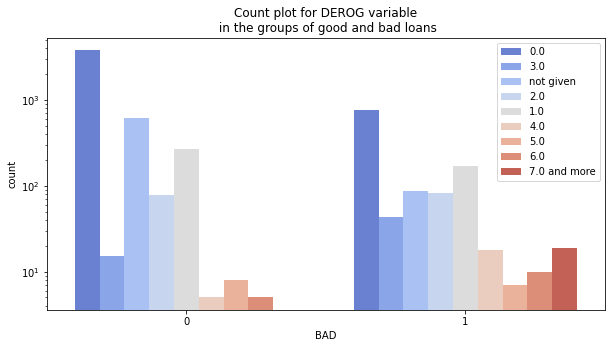

In [132]:
# Drawing a count plot for DEROG variable in the groups of good and bad loans
plt.figure(figsize=(10, 5))
sns.countplot(x='BAD', hue='DEROG', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Count plot for DEROG variable\n in the groups of good and bad loans')
plt.show()

In [133]:
# Adding the name of DEROG variable to the end of the list
categorical_features.append('DEROG')

Variable: **DELINQ**

In [134]:
# Checking the counts of unique values for DELINQ variable
data['DELINQ'].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [135]:
# Checking the counts of unique values for DELINQ variable in the group of good loans
data[data['BAD'] == 0]['DELINQ'].value_counts()

0.0    3596
1.0     432
2.0     138
3.0      58
4.0      32
5.0       7
Name: DELINQ, dtype: int64

In [136]:
# Checking the counts of unique values for DELINQ variable in the group of bad loans
data[data['BAD'] == 1]['DELINQ'].value_counts()

0.0     583
1.0     222
2.0     112
3.0      71
4.0      46
5.0      31
6.0      27
7.0      13
8.0       5
11.0      2
10.0      2
15.0      1
12.0      1
13.0      1
Name: DELINQ, dtype: int64

In [137]:
# Replacing DELINQ variable values at least equal 6 by '6.0 and more' category
data.loc[data['DELINQ'] >= 6, 'DELINQ'] = '6.0 and more'

In [138]:
# Checking the counts of unique values for DELINQ variable
data['DELINQ'].value_counts()

0.0             4179
1.0              654
2.0              250
3.0              129
4.0               78
6.0 and more      52
5.0               38
Name: DELINQ, dtype: int64

In [139]:
# Counting the sum of missing values for DELINQ variable
data['DELINQ'].isna().sum()

567

In [140]:
# Counting the sum of missing values for DELINQ variable in the group of good loans
data[data['BAD'] == 0]['DELINQ'].isna().sum()

496

In [141]:
# Counting the sum of missing values for DELINQ variable in the group of bad loans
data[data['BAD'] == 1]['DELINQ'].isna().sum()

71

We can fill missing values with "not given" category.

In [142]:
data['DELINQ'].fillna('not given', inplace=True)

In [143]:
# Counting the sum of missing values for DELINQ variable
data['DELINQ'].isna().sum()

0

In [144]:
# Checking the counts of unique values for DELINQ variable
data['DELINQ'].value_counts()

0.0             4179
1.0              654
not given        567
2.0              250
3.0              129
4.0               78
6.0 and more      52
5.0               38
Name: DELINQ, dtype: int64

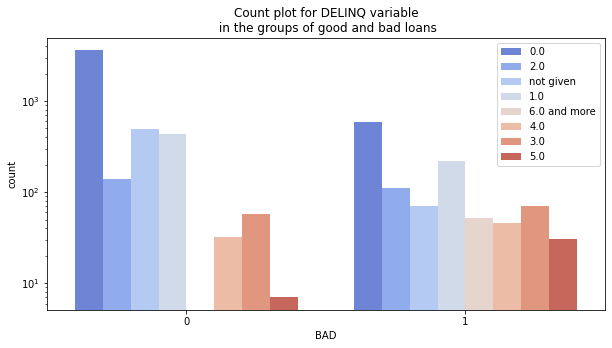

In [145]:
# Drawing a count plot for DELINQ variable in the groups of good and bad loans
plt.figure(figsize=(10, 5))
sns.countplot(x='BAD', hue='DELINQ', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Count plot for DELINQ variable\n in the groups of good and bad loans')
plt.show()

In [146]:
# Adding the name of DELINQ variable to the end of the list
categorical_features.append('DELINQ')

Variable: **CLAGE**

In [147]:
# Checking the counts of unique values for CLAGE variable
data['CLAGE'].value_counts()

102.500000    7
206.966667    7
123.766667    6
109.566667    6
95.366667     6
             ..
135.191907    1
408.187646    1
29.856365     1
285.386126    1
238.314471    1
Name: CLAGE, Length: 5314, dtype: int64

In [148]:
# Counting the sum of missing values for CLAGE variable
data['CLAGE'].isna().sum()

295

In [149]:
# Counting the sum of missing values for CLAGE variable in the group of good loans
data[data['BAD'] == 0]['CLAGE'].isna().sum()

218

In [150]:
# Counting the sum of missing values for CLAGE variable in the group of bad loans
data[data['BAD'] == 1]['CLAGE'].isna().sum()

77

We can fill missing values with the median.

In [151]:
# Filling missing values for CLAGE variable in the group of good loans with the median from this group
data.loc[(data['BAD'] == 0) & (data['CLAGE'].isna()), 'CLAGE'] = data[data['BAD'] == 0]['CLAGE'].median()

In [152]:
# Filling missing values for CLAGE variable in the group of bad loans with the median from this group
data.loc[(data['BAD'] == 1) & (data['CLAGE'].isna()), 'CLAGE'] = data[data['BAD'] == 1]['CLAGE'].median()

In [153]:
# Counting the sum of missing values for YOJ variable
data['CLAGE'].isna().sum()

0

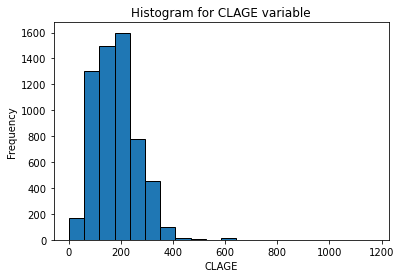

In [154]:
# Drawing a histogram for CLAGE variable
data['CLAGE'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for CLAGE variable')
plt.xlabel('CLAGE')
plt.show()

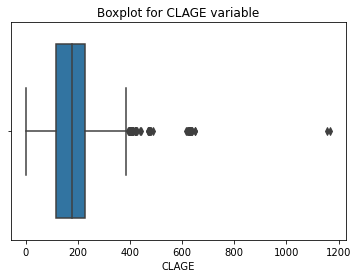

In [155]:
# Drawing a boxplot for CLAGE variable
sns.boxplot(x='CLAGE',data=data)
plt.title('Boxplot for CLAGE variable')
plt.show()

In [156]:
# Selecting dataframe rows for which CLAGE is greater than 1000
data[data['CLAGE'] > 1000]

,BAD,REASON,JOB,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,log_LOAN,log_MORTDUE,log_VALUE,sqrt_YOJ
3085,1,DebtCon,Other,0.0,0.0,1154.633333,0.0,0.0,NaN,9.729134,11.377106,11.954401,1.732051
3667,1,DebtCon,Other,0.0,0.0,1168.233561,0.0,0.0,40.206138,9.867860,11.476821,11.969141,1.732051


We assume that the values of CLAGE variable 1154.63 months (96.2 years) and 1168.23 months (97.4 years) are not incorrect, although they seem to be suspect. We should contact with a specialist.

In [157]:
# Calculating the skewness coefficient value
data['CLAGE'].skew()

1.3883506025300392

This variable has a skewed distribution. Therefore, we can introduce square root transformation (in our case, logarithmic transformation barely changes the skewness strength of CLAGE variable distribution).

In [158]:
# Checking the minimum value of the variable distribution
data['CLAGE'].min()

0.0

In [159]:
# Creating a new sqrt_CLAGE variable
data['sqrt_CLAGE'] = np.sqrt(data['CLAGE'])

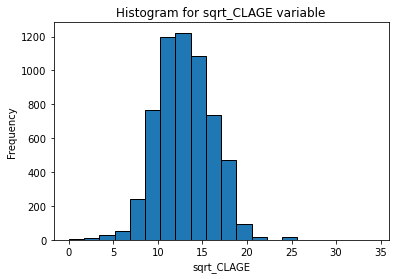

In [160]:
# Drawing a histogram for sqrt_CLAGE variable
data['sqrt_CLAGE'].plot.hist(edgecolor='black', bins=20)
plt.title('Histogram for sqrt_CLAGE variable')
plt.xlabel('sqrt_CLAGE')
plt.show()

In [161]:
# Checking the distribution skewness (after square root transformation)
data['sqrt_CLAGE'].skew()

0.12626408501503728

In [162]:
# Removing CLAGE variable from the dataframe
data.drop('CLAGE', axis=1, inplace=True)

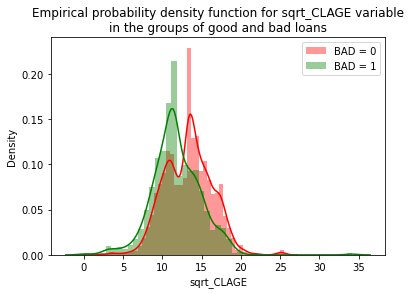

In [163]:
# Drawing an empirical probability density function for sqrt_CLAGE variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['sqrt_CLAGE'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['sqrt_CLAGE'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for sqrt_CLAGE variable\nin the groups of good and bad loans')
plt.show()

Variable: **NINQ**

In [164]:
# Checking the counts of unique values for NINQ variable
data['NINQ'].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

In [165]:
# Checking the counts of unique values for NINQ variable in the group of good loans
data[data['BAD'] == 0]['NINQ'].value_counts()

0.0     2135
1.0     1085
2.0      599
3.0      285
4.0       95
5.0       39
7.0       29
6.0       27
10.0      19
8.0       11
11.0       7
9.0        5
Name: NINQ, dtype: int64

In [166]:
# Checking the counts of unique values for NINQ variable in the group of bad loans
data[data['BAD'] == 1]['NINQ'].value_counts()

0.0     396
1.0     254
2.0     181
3.0     107
4.0      61
5.0      36
6.0      29
7.0      15
8.0      11
10.0      9
9.0       6
11.0      3
12.0      2
13.0      2
17.0      1
14.0      1
Name: NINQ, dtype: int64

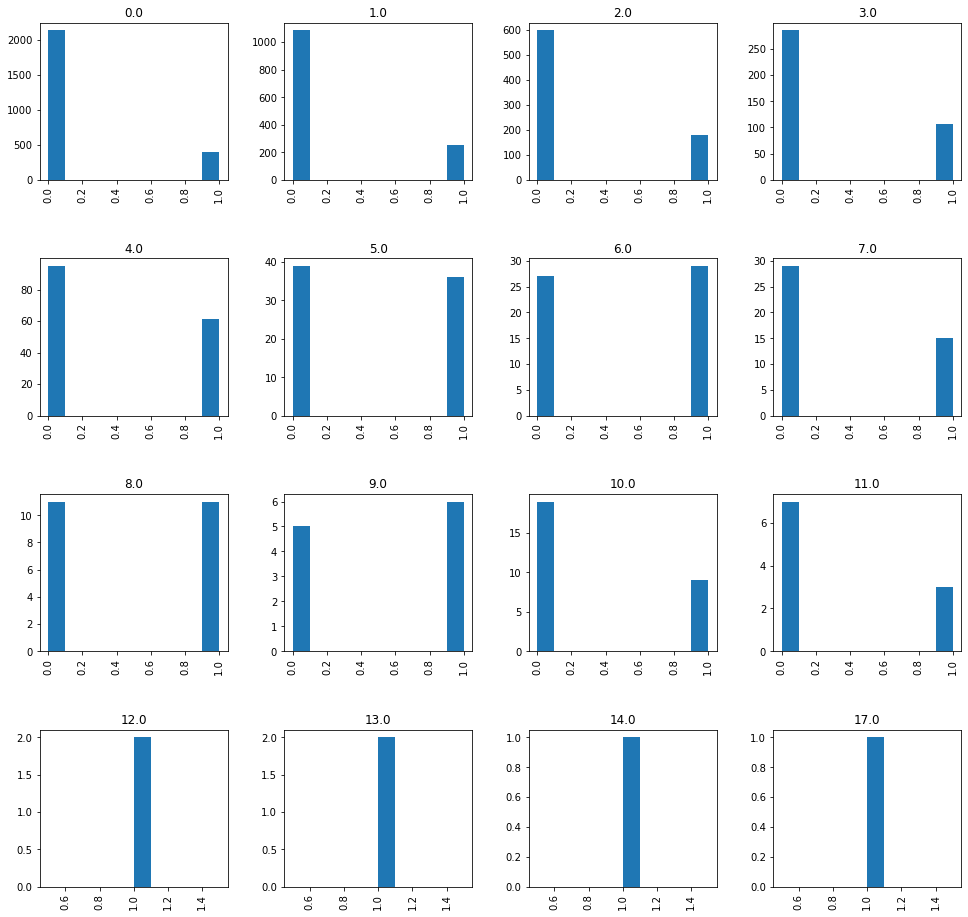

In [167]:
# Drawing distribution of BAD variable for each value of NINQ variable
data['BAD'].hist(by=data['NINQ'], figsize=(16, 16))
plt.show()

In [168]:
# Grouping NINQ variable values by their mean BAD score, and displaying the results
NINQ_to_mean_mapping = data.groupby('NINQ')['BAD'].mean()
NINQ_to_mean_mapping

NINQ
0.0     0.156460
1.0     0.189694
2.0     0.232051
3.0     0.272959
4.0     0.391026
5.0     0.480000
6.0     0.517857
7.0     0.340909
8.0     0.500000
9.0     0.545455
10.0    0.321429
11.0    0.300000
12.0    1.000000
13.0    1.000000
14.0    1.000000
17.0    1.000000
Name: BAD, dtype: float64

In [169]:
# Splitting grouped NINQ variable values by their mean BAD score into 3 buckets, and creating a dictionary
# with the obtained results
NINQ_map = dict(pd.cut(NINQ_to_mean_mapping, bins=3, labels=['category_1', 'category_2', 'category_3']))

In [170]:
# Displaying the contents of the dictionary 
NINQ_map

{0.0: 'category_1',
 1.0: 'category_1',
 2.0: 'category_1',
 3.0: 'category_1',
 4.0: 'category_1',
 5.0: 'category_2',
 6.0: 'category_2',
 7.0: 'category_1',
 8.0: 'category_2',
 9.0: 'category_2',
 10.0: 'category_1',
 11.0: 'category_1',
 12.0: 'category_3',
 13.0: 'category_3',
 14.0: 'category_3',
 17.0: 'category_3'}

In [171]:
# Converting NINQ variable values according to the created dictionary
data['NINQ'].replace(NINQ_map, inplace=True)

In [172]:
# Checking the counts of unique values for NINQ variable
data['NINQ'].value_counts()

category_1    5280
category_2     164
category_3       6
Name: NINQ, dtype: int64

In [173]:
# Counting the sum of missing values for NINQ variable
data['NINQ'].isna().sum()

497

In [174]:
# Counting the sum of missing values for NINQ variable in the group of good loans
data[data['BAD'] == 0]['NINQ'].isna().sum()

423

In [175]:
# Counting the sum of missing values for NINQ variable in the group of bad loans
data[data['BAD'] == 1]['NINQ'].isna().sum()

74

We can fill missing values with "not given" category.

In [176]:
data['NINQ'].fillna('not given', inplace=True)

In [177]:
# Counting the sum of missing values for NINQ variable
data['NINQ'].isna().sum()

0

In [178]:
# Checking the counts of unique values for NINQ variable
data['NINQ'].value_counts()

category_1    5280
not given      497
category_2     164
category_3       6
Name: NINQ, dtype: int64

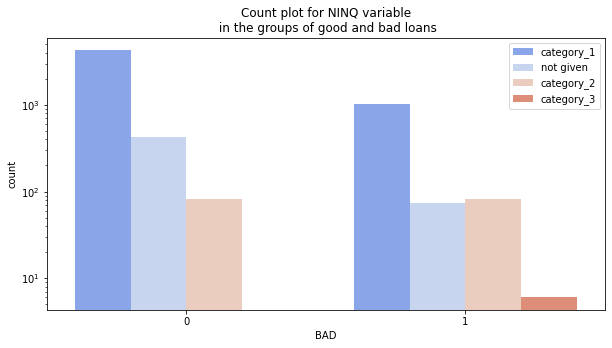

In [179]:
# Drawing a count plot for NINQ variable in the groups of good and bad loans 
plt.figure(figsize=(10, 5))
sns.countplot(x='BAD', hue='NINQ', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Count plot for NINQ variable\n in the groups of good and bad loans')
plt.show()

In [180]:
# Adding the name of NINQ variable to the end of the list
categorical_features.append('NINQ')

Variable: **CLNO**

In [181]:
# Checking the counts of unique values for CLNO variable
data['CLNO'].value_counts()

16.0    316
19.0    307
24.0    264
23.0    259
21.0    235
       ... 
65.0      3
53.0      2
71.0      2
63.0      1
57.0      1
Name: CLNO, Length: 62, dtype: int64

In [182]:
# Counting the sum of missing values for CLNO variable
data['CLNO'].isna().sum()

209

In [183]:
# Counting the sum of missing values for CLNO variable in the group of good loans
data[data['BAD'] == 0]['CLNO'].isna().sum()

157

In [184]:
# Counting the sum of missing values for CLNO variable in the group of bad loans
data[data['BAD'] == 1]['CLNO'].isna().sum()

52

We can fill missing values with the median.

In [185]:
# Calculating the median for CLNO variable in the group of good loans
data[data['BAD'] == 0]['CLNO'].median()

20.0

In [186]:
# Calculating the median for CLNO variable in the group of bad loans
data[data['BAD'] == 1]['CLNO'].median()

20.0

In [187]:
# Filling missing values for CLNO variable with 20.0
data['CLNO'].fillna(20.0, inplace=True)

In [188]:
# Counting the sum of missing values for CLNO variable
data['CLNO'].isna().sum()

0

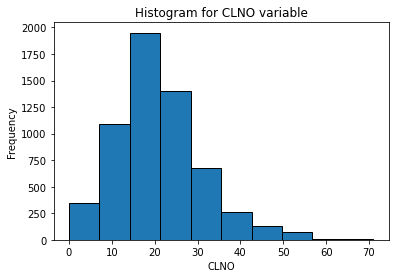

In [189]:
# Drawing a histogram for CLNO variable
data['CLNO'].plot.hist(edgecolor='black')
plt.title('Histogram for CLNO variable')
plt.xlabel('CLNO')
plt.show()

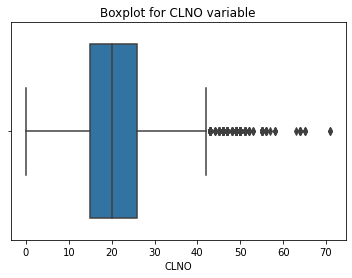

In [190]:
# Drawing a boxplot for CLNO variable
sns.boxplot(x='CLNO',data=data)
plt.title('Boxplot for CLNO variable')
plt.show()

In [191]:
# Calculating the skewness coefficient value
data['CLNO'].skew()

0.8019984008209693

This variable has a skewed distribution. Nevertheless, it is not a highly skewed one. Therefore, we will not introduce any transformation.

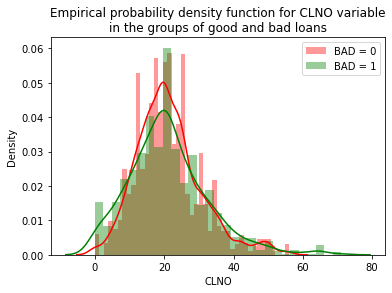

In [192]:
# Drawing an empirical probability density function for CLNO variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['CLNO'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['CLNO'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for CLNO variable\nin the groups of good and bad loans')
plt.show()

Variable: **DEBTINC**

In [193]:
# Checking the counts of unique values for DEBTINC variable
data['DEBTINC'].value_counts()

34.936674    1
36.401730    1
12.386741    1
38.709991    1
33.964777    1
            ..
29.696346    1
28.662173    1
31.869810    1
32.778271    1
39.481663    1
Name: DEBTINC, Length: 4687, dtype: int64

In [194]:
# Counting the sum of missing values for DEBTINC variable
data['DEBTINC'].isna().sum()

1260

In [195]:
# Counting the sum of missing values for DEBTINC variable in the group of good loans
data[data['BAD'] == 0]['DEBTINC'].isna().sum()

475

In [196]:
# Counting the sum of missing values for DEBTINC variable in the group of bad loans
data[data['BAD'] == 1]['DEBTINC'].isna().sum()

785

In [197]:
# Checking percentages of missing values for DEBTINC variable
missing_values_percentages.loc[11]

Variable                                         DEBTINC
missing values in the whole data set (%)           21.19
missing values in the group of good loans (%)       9.98
missing values in the group of bad loans (%)       66.08
Name: 11, dtype: object

Because more than 20% of observations of DEBTINC variable are missing values (in the group of bad loans - more than 66%), we can create a new feature called Missing_DEBTINC informing about missing data.

In [198]:
# Creating a new Missing_DEBTINC variable
data['Missing_DEBTINC'] = data['DEBTINC'].isna()

In [199]:
# Adding the name of Missing_DEBTINC variable to the end of the list
categorical_features.append('Missing_DEBTINC')

We can fill missing values with the median.

In [200]:
# Filling missing values for DEBTINC variable in the group of good loans with the median from this group
data.loc[(data['BAD'] == 0) & (data['DEBTINC'].isna()), 'DEBTINC'] = data[data['BAD'] == 0]['DEBTINC'].median()

In [201]:
# Filling missing values for DEBTINC variable in the group of bad loans with the median from this group
data.loc[(data['BAD'] == 1) & (data['DEBTINC'].isna()), 'DEBTINC'] = data[data['BAD'] == 1]['DEBTINC'].median()

In [202]:
# Counting the sum of missing values for DEBTINC variable
data['DEBTINC'].isna().sum()

0

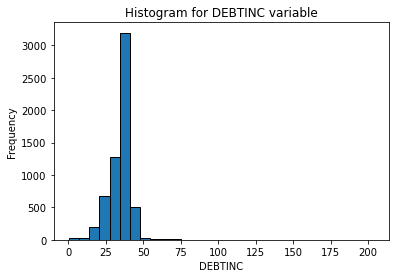

In [203]:
# Drawing a histogram for DEBTINC variable
data['DEBTINC'].plot.hist(edgecolor='black', bins=30)
plt.title('Histogram for DEBTINC variable')
plt.xlabel('DEBTINC')
plt.show()

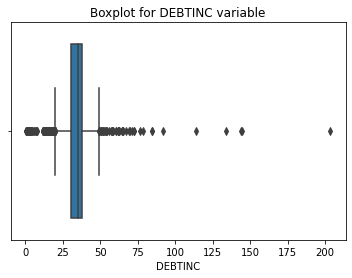

In [204]:
# Drawing a boxplot for DEBTINC variable
sns.boxplot(x='DEBTINC',data=data)
plt.title('Boxplot for DEBTINC variable')
plt.show()

In [205]:
# Selecting dataframe rows for which DEBTINC is greater than 125
data[data['DEBTINC'] > 125]

,BAD,REASON,JOB,DEROG,DELINQ,NINQ,CLNO,DEBTINC,log_LOAN,log_MORTDUE,log_VALUE,sqrt_YOJ,sqrt_CLAGE,Missing_DEBTINC
3898,1,HomeImp,Self,1.0,0.0,category_1,26.0,143.949605,9.928180,11.643629,11.783983,1.732051,15.610272,False
4410,1,NotGiven,Other,0.0,2.0,category_1,33.0,133.528270,10.043249,10.978097,11.146590,2.000000,10.507829,False
4460,1,DebtCon,Sales,0.0,not given,category_1,19.0,203.312149,10.056209,11.550057,11.795183,1.000000,10.970322,False
5899,1,DebtCon,ProfExe,0.0,0.0,category_1,21.0,144.189001,11.089805,12.231526,12.578460,1.414214,9.940232,False


In [206]:
# Calculating the skewness coefficient value
data['DEBTINC'].skew()

2.8284500666191916

This variable has a skewed distribution. Therefore, we can introduce square root transformation (in our case, logarithmic transformation does not reduce the skewness strength of DEBTINC variable distribution).

In [207]:
# Checking the minimum value of the variable distribution
data['DEBTINC'].min()

0.5244992154

In [208]:
# Creating a new sqrt_DEBTINC variable
data['sqrt_DEBTINC'] = np.sqrt(data['DEBTINC'])

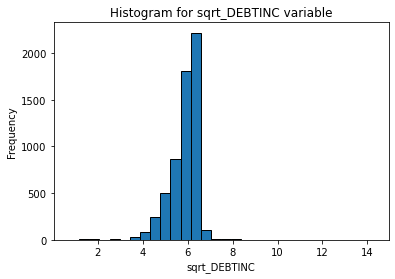

In [209]:
# Drawing a histogram for sqrt_DEBTINC variable
data['sqrt_DEBTINC'].plot.hist(edgecolor='black', bins=30)
plt.title('Histogram for sqrt_DEBTINC variable')
plt.xlabel('sqrt_DEBTINC')
plt.show()

In [210]:
# Checking the distribution skewness (after square root transformation)
data['sqrt_DEBTINC'].skew()

-0.8651596707186173

In [211]:
# Removing DEBTINC variable from the dataframe
data.drop('DEBTINC', axis=1, inplace=True)

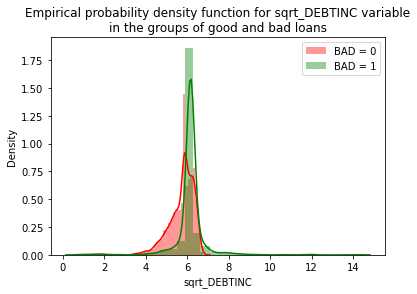

In [212]:
# Drawing an empirical probability density function for sqrt_DEBTINC variable in the groups of good and bad loans
sns.distplot(data[data['BAD']==0]['sqrt_DEBTINC'], color='r', label='BAD = 0')
sns.distplot(data[data['BAD']==1]['sqrt_DEBTINC'], color='g', label='BAD = 1')
plt.legend()
plt.title('Empirical probability density function for sqrt_DEBTINC variable\nin the groups of good and bad loans')
plt.show()

## 3. Dataset preparation and train-test split

In [213]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

In [214]:
# Displaying basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5947 entries, 0 to 5946
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BAD              5947 non-null   int64  
 1   REASON           5947 non-null   object 
 2   JOB              5947 non-null   object 
 3   DEROG            5947 non-null   object 
 4   DELINQ           5947 non-null   object 
 5   NINQ             5947 non-null   object 
 6   CLNO             5947 non-null   float64
 7   log_LOAN         5947 non-null   float64
 8   log_MORTDUE      5947 non-null   float64
 9   log_VALUE        5947 non-null   float64
 10  sqrt_YOJ         5947 non-null   float64
 11  sqrt_CLAGE       5947 non-null   float64
 12  Missing_DEBTINC  5947 non-null   bool   
 13  sqrt_DEBTINC     5947 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(5)
memory usage: 609.9+ KB


In [215]:
# Displaying categorical features names
categorical_features

['REASON', 'JOB', 'DEROG', 'DELINQ', 'NINQ', 'Missing_DEBTINC']

In [216]:
# Creating a list with continuous features names
continuous_features = data.drop(categorical_features+['BAD'], axis=1).columns.tolist()

In [217]:
# Displaying continuous features names
continuous_features

['CLNO',
 'log_LOAN',
 'log_MORTDUE',
 'log_VALUE',
 'sqrt_YOJ',
 'sqrt_CLAGE',
 'sqrt_DEBTINC']

In [218]:
# Defining y
y = data['BAD']

In [219]:
# Removing BAD variable from the dataframe
data.drop('BAD', axis=1, inplace=True)

In [220]:
# Converting all categorical features into dummy variables, and defining X
X = pd.get_dummies(data=data, columns=categorical_features)

In [221]:
# Checking the dimensionality of y
y.shape

(5947,)

In [222]:
# Checking the dimensionality of X
X.shape

(5947, 40)

In [223]:
# Splitting the data into a train set and a test set with stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [224]:
# Checking the dimensionality of X_train
X_train.shape

(4162, 40)

In [225]:
# Checking the dimensionality of y_train
y_train.shape

(4162,)

In [226]:
# Displaying the number of times each unique value from y_train appears
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3331,  831], dtype=int64))

In [227]:
# Checking the proportion of bad loans in the train set
y_train.mean()

0.199663623258049

In [228]:
# Checking the dimensionality of X_test
X_test.shape

(1785, 40)

In [229]:
# Checking the dimensionality of y_test
y_test.shape

(1785,)

In [230]:
# Displaying the number of times each unique value from y_test appears
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([1428,  357], dtype=int64))

In [231]:
# Checking the proportion of bad loans in the test set
y_test.mean()

0.2

## 4. Building machine learning models

Assumptions:
- The main problem to solve is building a credit scoring model for the consumer credit department to automate the decisionmaking process for approval of home equity lines of credit. A model should predict whether a customer/loan is good or bad. We focus on the positive class (class 1) which is the bad customer/loan. This is the minority class. In this situation false negative denotes a bad customer/loan (class 1) predicted as a good customer/loan (class 0). False positive, in turn, denotes a good customer/loan (class 0) predicted as a bad customer/loan (class 1).
- For a bank, false negatives are more costly than false positives. Therefore, we will use F2-measure (F2 score) as the main metric classification. This metric is a weighted harmonic mean of precision and recall (sensitivity), and it gives more attention to recall than precision. During the analysis, apart from F2-measure, the values of the following metrics will be calculated: precision score, recall (sensitivity) score, specificity score. 
- In the analysis we will use 8 machine learning models: K Neighbors Classifier, Logistic Regression, Linear SVC, Nonlinear SVC, Random Forest Classifier, Extra Trees Classifier, XGB Classifier, Voting Classifier.
- While building the models, two approaches will be taken into account: the models will be built on the basis of imbalanced data (original dataset) and balanced data (over-sampling with SMOTE).

### 4.1. Function defining

In [232]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, fbeta_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [233]:
# Defining a function calculating the value of specificity score

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [234]:
# Defining a function returning a dataframe with values of classification metrics for data from train and test sets

def model_evaluation(best_estimator):
    
    classification_metrics_names = ['F2 score', 'Precision score', 'Recall/Sensitivity score', 'Specificity score']
    scores_train_set = []
    scores_test_set = []
    
    scores_train_set.append(fbeta_score(y_train, best_estimator.predict(X_train),beta=2))
    scores_train_set.append(precision_score(y_train, best_estimator.predict(X_train)))
    scores_train_set.append(recall_score(y_train, best_estimator.predict(X_train)))
    scores_train_set.append(specificity_score(y_train, best_estimator.predict(X_train)))    
    
    scores_test_set.append(fbeta_score(y_test, best_estimator.predict(X_test),beta=2))
    scores_test_set.append(precision_score(y_test, best_estimator.predict(X_test)))
    scores_test_set.append(recall_score(y_test, best_estimator.predict(X_test)))
    scores_test_set.append(specificity_score(y_test, best_estimator.predict(X_test)))
    
    return pd.DataFrame({
        'Classification metric': classification_metrics_names,
        'train set': scores_train_set,
        'test set': scores_test_set
    })

In [235]:
# Defining a function displaying a confusion matrix and calculating specificity and sensitivity values 
# for the best estimator

def plot_confusion_matrix(best_estimator):
    
    cm = confusion_matrix(y_test, best_estimator.predict(X_test))
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    ax.set_title('Confusion matrix for data from the test set\n'\
                 + 'Specificity: ' + str(round(specificity*100,2)) + '%\n'\
                 + 'Sensitivity: ' + str(round(sensitivity*100,2)) + '%')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.xaxis.set_ticklabels(ticklabels=['0', '1'])
    ax.yaxis.set_ticklabels(ticklabels=['0', '1'], rotation='horizontal')
    plt.show()

In [236]:
# Defining a scaler used for scaling continuous features values
continuous_features_scaler = ColumnTransformer(
    [('std_scaler', StandardScaler(), continuous_features)],
    remainder='passthrough'
)

In [237]:
# Defining a stratified 5-folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [238]:
# Making a scorer - f2_score
f2_score = make_scorer(fbeta_score, beta=2)

### 4.2. Baseline models

In [239]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import make_pipeline

We can build baseline models. They are models with default parameters.

In [240]:
# Creating a list of classifiers
classifiers = [
    make_pipeline(continuous_features_scaler, KNeighborsClassifier()),
    make_pipeline(continuous_features_scaler, LogisticRegression(solver='liblinear')),
    make_pipeline(continuous_features_scaler, SVC(kernel='linear')),
    make_pipeline(continuous_features_scaler, SVC()),
    RandomForestClassifier(random_state=0),
    ExtraTreesClassifier(random_state=0),
    XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    VotingClassifier(estimators=[
        ('knc', make_pipeline(continuous_features_scaler, KNeighborsClassifier())),
        ('lr', make_pipeline(continuous_features_scaler, LogisticRegression(solver='liblinear'))),
        ('lsvc', make_pipeline(continuous_features_scaler, SVC(kernel='linear'))),
        ('nsvc', make_pipeline(continuous_features_scaler, SVC())),
        ('rfc', RandomForestClassifier(random_state=0)),
        ('etc', ExtraTreesClassifier(random_state=0)),
        ('xgbc', XGBClassifier(objective='binary:logistic', eval_metric='logloss'))
    ])
]

# Creating a list of classifiers names
classifiers_names = [
    'KNeighborsClassifier',
    'LogisticRegression',
    'LinearSVC',
    'NonlinearSVC',
    'RandomForestClassifier',
    'ExtraTreesClassifier',
    'XGBClassifier',
    'VotingClassifier'
]

In [241]:
# Creating a dataframe with classification metrics values for data from the test set for baseline models

f2_scores_baseline = []
precision_scores_baseline = []
recall_scores_baseline = []
specificity_scores_baseline = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    f2_scores_baseline.append(fbeta_score(y_test, clf.predict(X_test),beta=2))
    precision_scores_baseline.append(precision_score(y_test, clf.predict(X_test)))
    recall_scores_baseline.append(recall_score(y_test, clf.predict(X_test)))
    specificity_scores_baseline.append(specificity_score(y_test, clf.predict(X_test)))
    
df_scores_baseline = pd.DataFrame({
    'Method': classifiers_names,
    'f2 score (baseline)': f2_scores_baseline,
    'precision score (baseline)': precision_scores_baseline,
    'recall/sensitivity score (baseline)': recall_scores_baseline,
    'specificity score (baseline)': specificity_scores_baseline
})

In [242]:
# Displaying a dataframe with classification metrics values for baseline models
df_scores_baseline

,Method,f2 score (baseline),precision score (baseline),recall/sensitivity score (baseline),specificity score (baseline)
0,KNeighborsClassifier,0.588957,0.950495,0.537815,0.992997
1,LogisticRegression,0.659600,0.829630,0.627451,0.967787
2,LinearSVC,0.704756,0.820946,0.680672,0.962885
3,NonlinearSVC,0.768328,0.945848,0.733894,0.989496
4,RandomForestClassifier,0.814771,1.000000,0.778711,1.000000
5,ExtraTreesClassifier,0.816803,0.979021,0.784314,0.995798
6,XGBClassifier,0.851187,0.983278,0.823529,0.996499
7,VotingClassifier,0.788235,0.985294,0.750700,0.997199


The best baseline model is XGBClassifier (f2 score = 0.851187) and the worst one is KNeighborsClassifier (f2 score = 0.588957).

### 4.3. Building models on the basis of imbalanced data (original dataset)

In [243]:
# Importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as ss

In [244]:
# The list below will store the best estimators from GridSearchCV/RandomizedSearchCV
best_estimators = []

4.3.1. KNeighborsClassifier

In [245]:
# Tuning hyper-parameters for KNeighborsClassifier

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': list(range(1, 12, 2)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_0 = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_0.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_0.best_score_, grid_0.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.7480 
was obtained by the estimator with parameters: 
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}.


In [246]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_0.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.761765
1,Precision score,1.0,0.952206
2,Recall/Sensitivity score,1.0,0.725490
3,Specificity score,1.0,0.990896


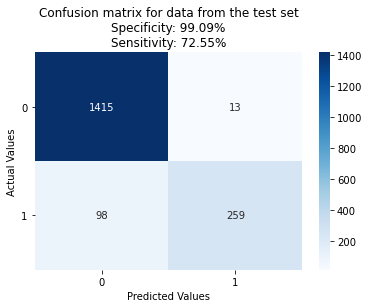

In [247]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_0.best_estimator_)

In [248]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_0.best_estimator_)

4.3.2. LogisticRegression

In [249]:
# Tuning hyper-parameters for LogisticRegression

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('classifier', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'classifier__C': [5, 10, 15, 20, 25],
    'classifier__penalty': ['l1', 'l2']
}

grid_1 = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_1.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_1.best_score_, grid_1.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.6801 
was obtained by the estimator with parameters: 
{'classifier__C': 15, 'classifier__penalty': 'l2'}.


In [250]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_1.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.692250,0.663925
1,Precision score,0.832579,0.824818
2,Recall/Sensitivity score,0.664260,0.633053
3,Specificity score,0.966677,0.966387


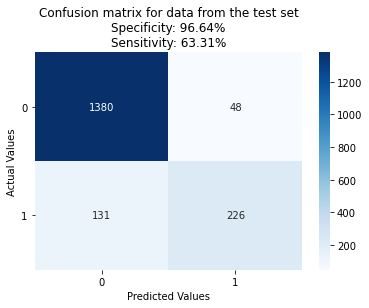

In [251]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_1.best_estimator_)

In [252]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_1.best_estimator_)

4.3.3. LinearSVC

In [253]:
# Tuning hyper-parameters for LinearSVC

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('classifier', SVC(kernel='linear', probability=True, random_state=0))
])

param_grid = {
    'classifier__C': [550, 600, 650]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_2.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_2.best_score_, grid_2.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.7041 
was obtained by the estimator with parameters: 
{'classifier__C': 600}.


In [254]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_2.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.708927,0.694282
1,Precision score,0.840000,0.832168
2,Recall/Sensitivity score,0.682310,0.666667
3,Specificity score,0.967577,0.966387


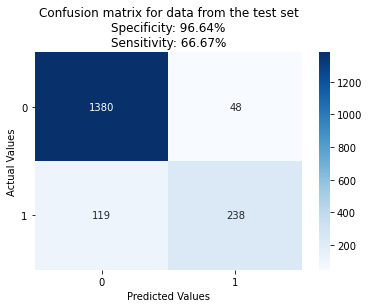

In [255]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_2.best_estimator_)

In [256]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_2.best_estimator_)

4.3.4. NonlinearSVC

In [257]:
# Tuning hyper-parameters for NonlinearSVC

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('classifier', SVC())
])

param_grid = [
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'classifier__kernel': ['poly'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'classifier__degree': [2, 3, 4, 5]
    }
]

grid_3 = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_3.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_3.best_score_, grid_3.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8614 
was obtained by the estimator with parameters: 
{'classifier__C': 100, 'classifier__kernel': 'rbf'}.


In [258]:
# Tuning hyper-parameters for NonlinearSVC with rbf kernel

pipe = Pipeline([
    ('scaler', continuous_features_scaler), # bezwzględnie wymagana standaryzacja !!!
    ('classifier', SVC(probability=True, random_state=0))
])

param_grid = {
    'classifier__kernel': ['rbf'],
    'classifier__C': [40, 45, 50, 55, 60]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_3.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_3.best_score_, grid_3.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8717 
was obtained by the estimator with parameters: 
{'classifier__C': 50, 'classifier__kernel': 'rbf'}.


In [259]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_3.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.973837,0.829948
1,Precision score,1.000000,0.969492
2,Recall/Sensitivity score,0.967509,0.801120
3,Specificity score,1.000000,0.993697


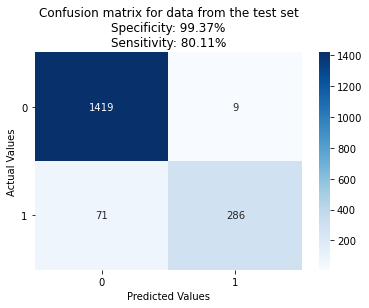

In [260]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_3.best_estimator_)

In [261]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_3.best_estimator_)

4.3.5. RandomForestClassifier

In [262]:
# Tuning hyper-parameters for RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [5, 10, 15, 20, None],
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}

grid_4 = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=skf, scoring=f2_score,
                      return_train_score=True)

grid_4.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_4.best_score_, grid_4.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8207 
was obtained by the estimator with parameters: 
{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}.


In [263]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_4.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.821637
1,Precision score,1.0,0.996454
2,Recall/Sensitivity score,1.0,0.787115
3,Specificity score,1.0,0.999300


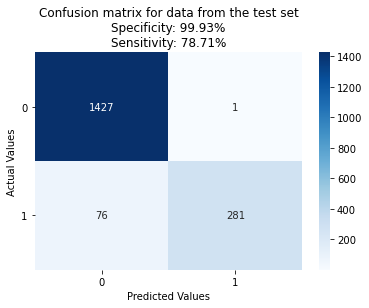

In [264]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_4.best_estimator_)

In [265]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_4.best_estimator_)

4.3.6. ExtraTreesClassifier

In [266]:
# Tuning hyper-parameters for ExtraTreesClassifier

param_grid = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [5, 10, 15, 20, None],
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}

grid_5 = GridSearchCV(ExtraTreesClassifier(random_state=0), param_grid, cv=skf, scoring=f2_score, 
                      return_train_score=True)

grid_5.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_5.best_score_, grid_5.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8138 
was obtained by the estimator with parameters: 
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400}.


In [267]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_5.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.811916
1,Precision score,1.0,0.978873
2,Recall/Sensitivity score,1.0,0.778711
3,Specificity score,1.0,0.995798


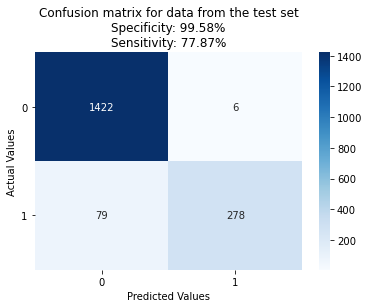

In [268]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_5.best_estimator_)

In [269]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_5.best_estimator_)

4.3.7. XGBClassifier

In [270]:
# Tuning hyper-parameters for XGBClassifier

param_grid = {
    'n_estimators': ss.randint(10, 50),
    'learning_rate': ss.uniform(0.01, 0.3),
    'max_depth': ss.randint(2, 8),
    'min_child_weight': ss.randint(1, 30),
    'reg_lambda': ss.uniform(0.1, 4)
}

grid_6 = RandomizedSearchCV(XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_grid, 
                             n_iter=800, cv=skf, random_state=0, scoring=f2_score, return_train_score=True)

grid_6.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_6.best_score_, grid_6.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8324 
was obtained by the estimator with parameters: 
{'learning_rate': 0.3024969436829634, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 42, 'reg_lambda': 0.5096550338096656}.


In [271]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_6.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.976761,0.836723
1,Precision score,1.000000,0.982935
2,Recall/Sensitivity score,0.971119,0.806723
3,Specificity score,1.000000,0.996499


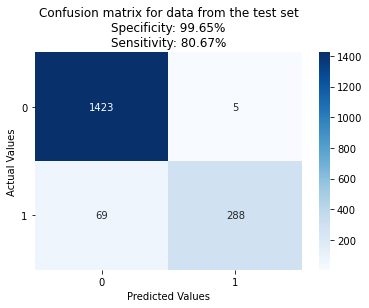

In [272]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_6.best_estimator_)

In [273]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_6.best_estimator_)

4.3.8. VotingClassifier

In [274]:
# Tuning hyper-parameters for VotingClassifier

estimators = [
    ('knc', best_estimators[0]),
    ('lr', best_estimators[1]),
    ('lsvc', best_estimators[2]),
    ('nsvc', best_estimators[3]),
    ('rfc', best_estimators[4]),
    ('etc', best_estimators[5]),
    ('xgbc', best_estimators[6])
]

param_grid = {
    'voting': ['hard', 'soft']
}

grid_7 = GridSearchCV(VotingClassifier(estimators), param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_7.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_7.best_score_, grid_7.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8342 
was obtained by the estimator with parameters: 
{'voting': 'soft'}.


In [275]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_7.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.986477,0.838184
1,Precision score,1.000000,0.993103
2,Recall/Sensitivity score,0.983153,0.806723
3,Specificity score,1.000000,0.998599


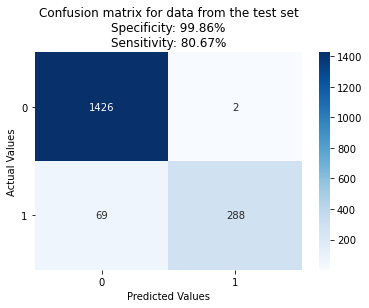

In [276]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_7.best_estimator_)

In [277]:
# Adding the best estimator to the end of the list
best_estimators.append(grid_7.best_estimator_)

4.3.9. Summary of the results

In [278]:
# Creating a dataframe with classification metrics values for baseline models and non-baseline models built on 
# the basis of imbalanced data

f2_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for best_est in best_estimators:
    f2_scores.append(fbeta_score(y_test, best_est.predict(X_test),beta=2))
    precision_scores.append(precision_score(y_test, best_est.predict(X_test)))
    recall_scores.append(recall_score(y_test, best_est.predict(X_test)))
    specificity_scores.append(specificity_score(y_test, best_est.predict(X_test)))
    
df_scores = pd.DataFrame({
    'Method': classifiers_names,
    'f2 score (baseline)': f2_scores_baseline,
    'f2 score': f2_scores,
    'precision score (baseline)': precision_scores_baseline,
    'precision score': precision_scores,
    'recall/sensitivity score (baseline)': recall_scores_baseline,
    'recall/sensitivity score': recall_scores,
    'specificity score (baseline)': specificity_scores_baseline,
    'specificity score': specificity_scores
})

In [279]:
# Displaying a dataframe with classification metrics values for baseline models and non-baseline models built on 
# the basis of imbalanced data
df_scores

,Method,f2 score (baseline),f2 score,precision score (baseline),precision score,recall/sensitivity score (baseline),recall/sensitivity score,specificity score (baseline),specificity score
0,KNeighborsClassifier,0.588957,0.761765,0.950495,0.952206,0.537815,0.725490,0.992997,0.990896
1,LogisticRegression,0.659600,0.663925,0.829630,0.824818,0.627451,0.633053,0.967787,0.966387
2,LinearSVC,0.704756,0.694282,0.820946,0.832168,0.680672,0.666667,0.962885,0.966387
3,NonlinearSVC,0.768328,0.829948,0.945848,0.969492,0.733894,0.801120,0.989496,0.993697
4,RandomForestClassifier,0.814771,0.821637,1.000000,0.996454,0.778711,0.787115,1.000000,0.999300
5,ExtraTreesClassifier,0.816803,0.811916,0.979021,0.978873,0.784314,0.778711,0.995798,0.995798
6,XGBClassifier,0.851187,0.836723,0.983278,0.982935,0.823529,0.806723,0.996499,0.996499
7,VotingClassifier,0.788235,0.838184,0.985294,0.993103,0.750700,0.806723,0.997199,0.998599


In the group of non-baseline models, built on the basis of imbalanced data, the best one is VotingClassifier (f2 score = 0.838184), and then XGBClassifier (f2 score = 0.836723). Nevertheless, the highest value of f2 score (f2 score = 0.851187) belongs to the baseline XGBClassifier.

### 4.4. Building models on the basis of balanced data (over-sampling with SMOTE)

In [280]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [281]:
# The list below will store the best estimators from GridSearchCV/RandomizedSearchCV
best_estimators_smote = []

4.4.1. KNeighborsClassifier

In [282]:
# Tuning hyper-parameters for KNeighborsClassifier

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('smote', SMOTE(random_state=0)),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': list(range(1, 12, 2)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_0_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_0_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_0_sm.best_score_, grid_0_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8273 
was obtained by the estimator with parameters: 
{'classifier__metric': 'minkowski', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}.


In [283]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_0_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.809899
1,Precision score,1.0,0.822857
2,Recall/Sensitivity score,1.0,0.806723
3,Specificity score,1.0,0.956583


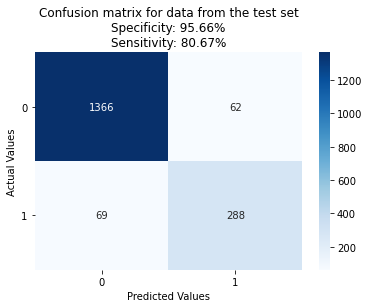

In [284]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_0_sm.best_estimator_)

In [285]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_0_sm.best_estimator_)

4.4.2. LogisticRegression

In [286]:
# Tuning hyper-parameters for LogisticRegression

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('smote', SMOTE(random_state=0)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'classifier__C': [1, 3, 5, 7, 9],
    'classifier__penalty': ['l1', 'l2']
}

grid_1_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_1_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_1_sm.best_score_, grid_1_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.7430 
was obtained by the estimator with parameters: 
{'classifier__C': 5, 'classifier__penalty': 'l2'}.


In [287]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_1_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.752822,0.746464
1,Precision score,0.603074,0.592516
2,Recall/Sensitivity score,0.802647,0.798319
3,Specificity score,0.868208,0.862745


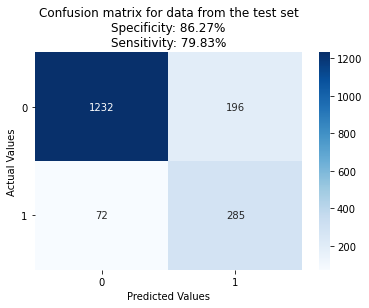

In [288]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_1_sm.best_estimator_)

In [289]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_1_sm.best_estimator_)

4.4.3. LinearSVC

In [290]:
# Tuning hyper-parameters for LinearSVC

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('smote', SMOTE(random_state=0)),
    ('classifier', SVC(kernel='linear', probability=True, random_state=0))
])

param_grid = {
    'classifier__C': [10, 50, 100, 150, 200]
}

grid_2_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_2_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_2_sm.best_score_, grid_2_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.7120 
was obtained by the estimator with parameters: 
{'classifier__C': 100}.


In [291]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_2_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.736203,0.721868
1,Precision score,0.616491,0.596491
2,Recall/Sensitivity score,0.773767,0.761905
3,Specificity score,0.879916,0.871148


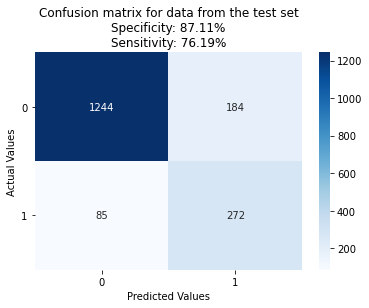

In [292]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_2_sm.best_estimator_)

In [293]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_2_sm.best_estimator_)

4.4.4. NonlinearSVC

In [294]:
# Tuning hyper-parameters for NonlinearSVC

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('smote', SMOTE(random_state=0)),
    ('classifier', SVC())
])

param_grid = [
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'classifier__kernel': ['poly'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'classifier__degree': [2, 3, 4, 5]
    }
]

grid_3_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_3_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_3_sm.best_score_, grid_3_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8537 
was obtained by the estimator with parameters: 
{'classifier__C': 10, 'classifier__kernel': 'rbf'}.


In [295]:
# Tuning hyper-parameters for NonlinearSVC with rbf kernel

pipe = Pipeline([
    ('scaler', continuous_features_scaler),
    ('smote', SMOTE(random_state=0)),
    ('classifier', SVC(probability=True, random_state=0))
])

param_grid = {
    'classifier__kernel': ['rbf'],
    'classifier__C': [1, 4, 7, 10, 13]
}

grid_3_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_3_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_3_sm.best_score_, grid_3_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8579 
was obtained by the estimator with parameters: 
{'classifier__C': 7, 'classifier__kernel': 'rbf'}.


In [296]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_3_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.968289,0.824176
1,Precision score,0.991326,0.946844
2,Recall/Sensitivity score,0.962696,0.798319
3,Specificity score,0.997899,0.988796


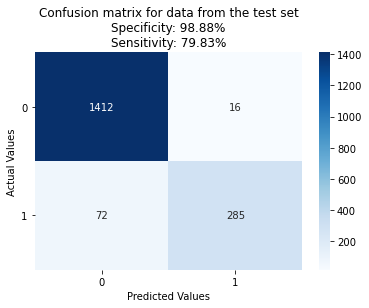

In [297]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_3_sm.best_estimator_)

In [298]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_3_sm.best_estimator_)

4.4.5. RandomForestClassifier

In [299]:
# Tuning hyper-parameters for RandomForestClassifier

pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('classifier', RandomForestClassifier(random_state=0))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 400, 800],
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion':['gini', 'entropy']    
}

grid_4_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_4_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_4_sm.best_score_, grid_4_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8568 
was obtained by the estimator with parameters: 
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 50}.


In [300]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_4_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.852174
1,Precision score,1.0,0.989899
2,Recall/Sensitivity score,1.0,0.823529
3,Specificity score,1.0,0.997899


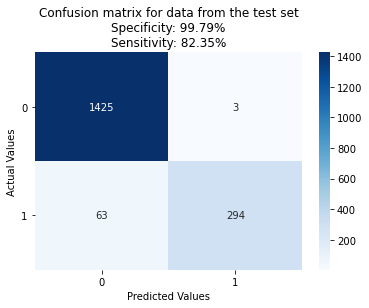

In [301]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_4_sm.best_estimator_)

In [302]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_4_sm.best_estimator_)

4.4.6. ExtraTreesClassifier

In [303]:
# Tuning hyper-parameters for ExtraTreesClassifier

pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('classifier', ExtraTreesClassifier(random_state=0))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 400, 800],
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion':['gini', 'entropy']
}

grid_5_sm = GridSearchCV(pipe, param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_5_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_5_sm.best_score_, grid_5_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8275 
was obtained by the estimator with parameters: 
{'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}.


In [304]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_5_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,1.0,0.821200
1,Precision score,1.0,0.975779
2,Recall/Sensitivity score,1.0,0.789916
3,Specificity score,1.0,0.995098


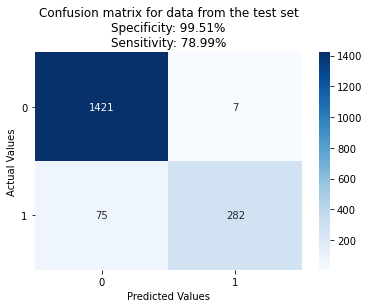

In [305]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_5_sm.best_estimator_)

In [306]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_5_sm.best_estimator_)

4.4.7. XGBClassifier

In [307]:
# Tuning hyper-parameters for XGBClassifier

pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss'))
])

param_grid = {
    'classifier__n_estimators': ss.randint(10, 50),
    'classifier__learning_rate': ss.uniform(0.01, 0.3),
    'classifier__max_depth': ss.randint(2, 8),
    'classifier__min_child_weight': ss.randint(1, 30),
    'classifier__reg_lambda': ss.uniform(0.1, 4)
}

grid_6_sm = RandomizedSearchCV(pipe, param_grid, n_iter=800, cv=skf, scoring=f2_score, return_train_score=True)

grid_6_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_6_sm.best_score_, grid_6_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8462 
was obtained by the estimator with parameters: 
{'classifier__learning_rate': 0.3008125888298618, 'classifier__max_depth': 7, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 49, 'classifier__reg_lambda': 4.06745586023088}.


In [308]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_6_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.981625,0.844907
1,Precision score,1.000000,0.973333
2,Recall/Sensitivity score,0.977136,0.817927
3,Specificity score,1.000000,0.994398


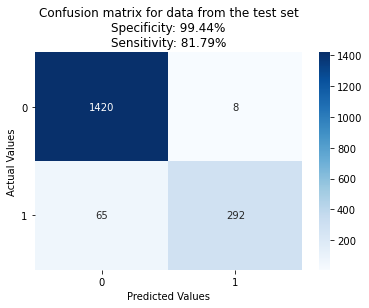

In [309]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_6_sm.best_estimator_)

In [310]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_6_sm.best_estimator_)

4.4.8. VotingClassifier

In [311]:
# Tuning hyper-parameters for VotingClassifier

estimators = [
    ('knc', best_estimators_smote[0]),
    ('lr', best_estimators_smote[1]),
    ('lsvc', best_estimators_smote[2]),
    ('nsvc', best_estimators_smote[3]),
    ('rfc', best_estimators_smote[4]),
    ('etc', best_estimators_smote[5]),
    ('xgbc', best_estimators_smote[6])
]

param_grid = {
    'voting': ['hard', 'soft']
}

grid_7_sm = GridSearchCV(VotingClassifier(estimators), param_grid, cv=skf, scoring=f2_score, return_train_score=True)

grid_7_sm.fit(X_train, y_train)

print('The highest mean cross-validated f2 score value (on the left out data) {:.4f} \
\nwas obtained by the estimator with parameters: \n{}.'.format(grid_7_sm.best_score_, grid_7_sm.best_params_))

The highest mean cross-validated f2 score value (on the left out data) 0.8650 
was obtained by the estimator with parameters: 
{'voting': 'soft'}.


In [312]:
# Calculating classification metrics values for the best estimator
model_evaluation(grid_7_sm.best_estimator_)

,Classification metric,train set,test set
0,F2 score,0.996146,0.843931
1,Precision score,1.000000,0.966887
2,Recall/Sensitivity score,0.995187,0.817927
3,Specificity score,1.000000,0.992997


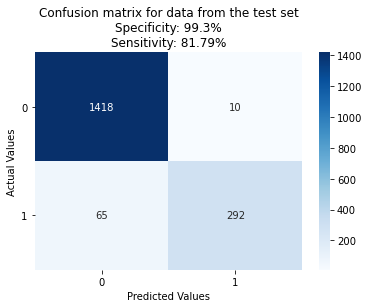

In [313]:
# Displaying a confusion matrix for the best estimator
plot_confusion_matrix(grid_7_sm.best_estimator_)

In [314]:
# Adding the best estimator to the end of the list
best_estimators_smote.append(grid_7_sm.best_estimator_)

4.4.9. Summary of the results

In [315]:
# Creating a dataframe with classification metrics values for baseline models and models built on the basis 
# of balanced data

f2_scores_smote = []
precision_scores_smote = []
recall_scores_smote = []
specificity_scores_smote = []

for best_est in best_estimators_smote:
    f2_scores_smote.append(fbeta_score(y_test, best_est.predict(X_test),beta=2))
    precision_scores_smote.append(precision_score(y_test, best_est.predict(X_test)))
    recall_scores_smote.append(recall_score(y_test, best_est.predict(X_test)))
    specificity_scores_smote.append(specificity_score(y_test, best_est.predict(X_test)))
    
df_scores_smote = pd.DataFrame({
    'Method': classifiers_names,
    'f2 score (baseline)': f2_scores_baseline,
    'f2 score (smote)': f2_scores_smote,
    'precision score (baseline)': precision_scores_baseline,
    'precision score (smote)': precision_scores_smote,
    'recall/sensitivity score (baseline)': recall_scores_baseline,
    'recall/sensitivity score (smote)': recall_scores_smote,
    'specificity score (baseline)': specificity_scores_baseline,
    'specificity score (smote)': specificity_scores_smote
})

In [316]:
# Displaying a dataframe with classification metrics values for baseline models and models built on the basis 
# of balanced data
df_scores_smote

,Method,f2 score (baseline),f2 score (smote),precision score (baseline),precision score (smote),recall/sensitivity score (baseline),recall/sensitivity score (smote),specificity score (baseline),specificity score (smote)
0,KNeighborsClassifier,0.588957,0.809899,0.950495,0.822857,0.537815,0.806723,0.992997,0.956583
1,LogisticRegression,0.659600,0.746464,0.829630,0.592516,0.627451,0.798319,0.967787,0.862745
2,LinearSVC,0.704756,0.721868,0.820946,0.596491,0.680672,0.761905,0.962885,0.871148
3,NonlinearSVC,0.768328,0.824176,0.945848,0.946844,0.733894,0.798319,0.989496,0.988796
4,RandomForestClassifier,0.814771,0.852174,1.000000,0.989899,0.778711,0.823529,1.000000,0.997899
5,ExtraTreesClassifier,0.816803,0.821200,0.979021,0.975779,0.784314,0.789916,0.995798,0.995098
6,XGBClassifier,0.851187,0.844907,0.983278,0.973333,0.823529,0.817927,0.996499,0.994398
7,VotingClassifier,0.788235,0.843931,0.985294,0.966887,0.750700,0.817927,0.997199,0.992997


In the group of models, built on the basis of balanced data (over-sampling with SMOTE), the best one is RandomForestClassifier (f2 score = 0.852174). The second place takes baseline XGBClassifier (f2 score = 0.851187).

## 5. Summary

In [317]:
# Creating a dataframe with classification metrics values for baseline models and non-baseline models built on 
# the basis of imbalanced and balanced data

df_scores_summary = pd.DataFrame({
    'Method': classifiers_names,
    'f2 score (baseline)': f2_scores_baseline,
    'f2 score': f2_scores,
    'f2 score (smote)': f2_scores_smote,
    'recall/sensitivity score (baseline)': recall_scores_baseline,
    'recall/sensitivity score': recall_scores,
    'recall/sensitivity score (smote)': recall_scores_smote,
    'specificity score (baseline)': specificity_scores_baseline,
    'specificity score': specificity_scores,
    'specificity score (smote)': specificity_scores_smote
})

In [318]:
# Displaying a dataframe with classification metrics values for baseline models, non-baseline models built on 
# the basis of imbalanced and balanced data, and highlighting metrics values for the best model

df_scores_summary.style.highlight_max(
    subset=['f2 score (smote)', 'recall/sensitivity score (smote)', 'specificity score (smote)'], 
    color='lightgreen'
)

,Method,f2 score (baseline),f2 score,f2 score (smote),recall/sensitivity score (baseline),recall/sensitivity score,recall/sensitivity score (smote),specificity score (baseline),specificity score,specificity score (smote)
0,KNeighborsClassifier,0.588957,0.761765,0.809899,0.537815,0.725490,0.806723,0.992997,0.990896,0.956583
1,LogisticRegression,0.659600,0.663925,0.746464,0.627451,0.633053,0.798319,0.967787,0.966387,0.862745
2,LinearSVC,0.704756,0.694282,0.721868,0.680672,0.666667,0.761905,0.962885,0.966387,0.871148
3,NonlinearSVC,0.768328,0.829948,0.824176,0.733894,0.801120,0.798319,0.989496,0.993697,0.988796
4,RandomForestClassifier,0.814771,0.821637,0.852174,0.778711,0.787115,0.823529,1.000000,0.999300,0.997899
5,ExtraTreesClassifier,0.816803,0.811916,0.821200,0.784314,0.778711,0.789916,0.995798,0.995798,0.995098
6,XGBClassifier,0.851187,0.836723,0.844907,0.823529,0.806723,0.817927,0.996499,0.996499,0.994398
7,VotingClassifier,0.788235,0.838184,0.843931,0.750700,0.806723,0.817927,0.997199,0.998599,0.992997


Comparing the obtained results, RandomForestClassifier, built on the basis of balanced data (over-sampling with SMOTE), renders to be the best (f2 score = 0.852174). It's sensitivity and specificity scores equal 0.823529 and 0.997899 respectively. It means that the model classifies correctly about 82.35% of bad customers/loans and 99.79% of good customers/loans.